FETAL ULTRASOUND DATASET ANALYSIS - DOWN SYNDROME DETECTION

1. EXPLORING DATASET DIRECTORY STRUCTURE
✓ External Test - Non-standard            :    92 images
✓ External Test - Standard                :    64 images
✓ Internal Test - Non-standard            :    84 images
✓ Internal Test - Standard                :    72 images
✓ Training CNN - Standard                 :   812 images
✓ Training ANN - Non-standard             :   311 images
✓ Training ANN - Standard                 :   249 images

2. ANALYZING OBJECT DETECTION ANNOTATIONS

📊 Annotation File Shape: (9433, 6)
   Columns: ['fname', 'structure', 'h_min', 'w_min', 'h_max', 'w_max']

📋 First few rows:
     fname   structure  h_min  w_min  h_max  w_max
0  168.png     thalami    178    171    244    261
1  168.png  nasal bone     96    308    111    349
2  168.png      palate    133    300    205    408
3  168.png  nasal skin     86    324     95    349
4  168.png   nasal tip     79    345     89    376
5  168.png    midbrain  

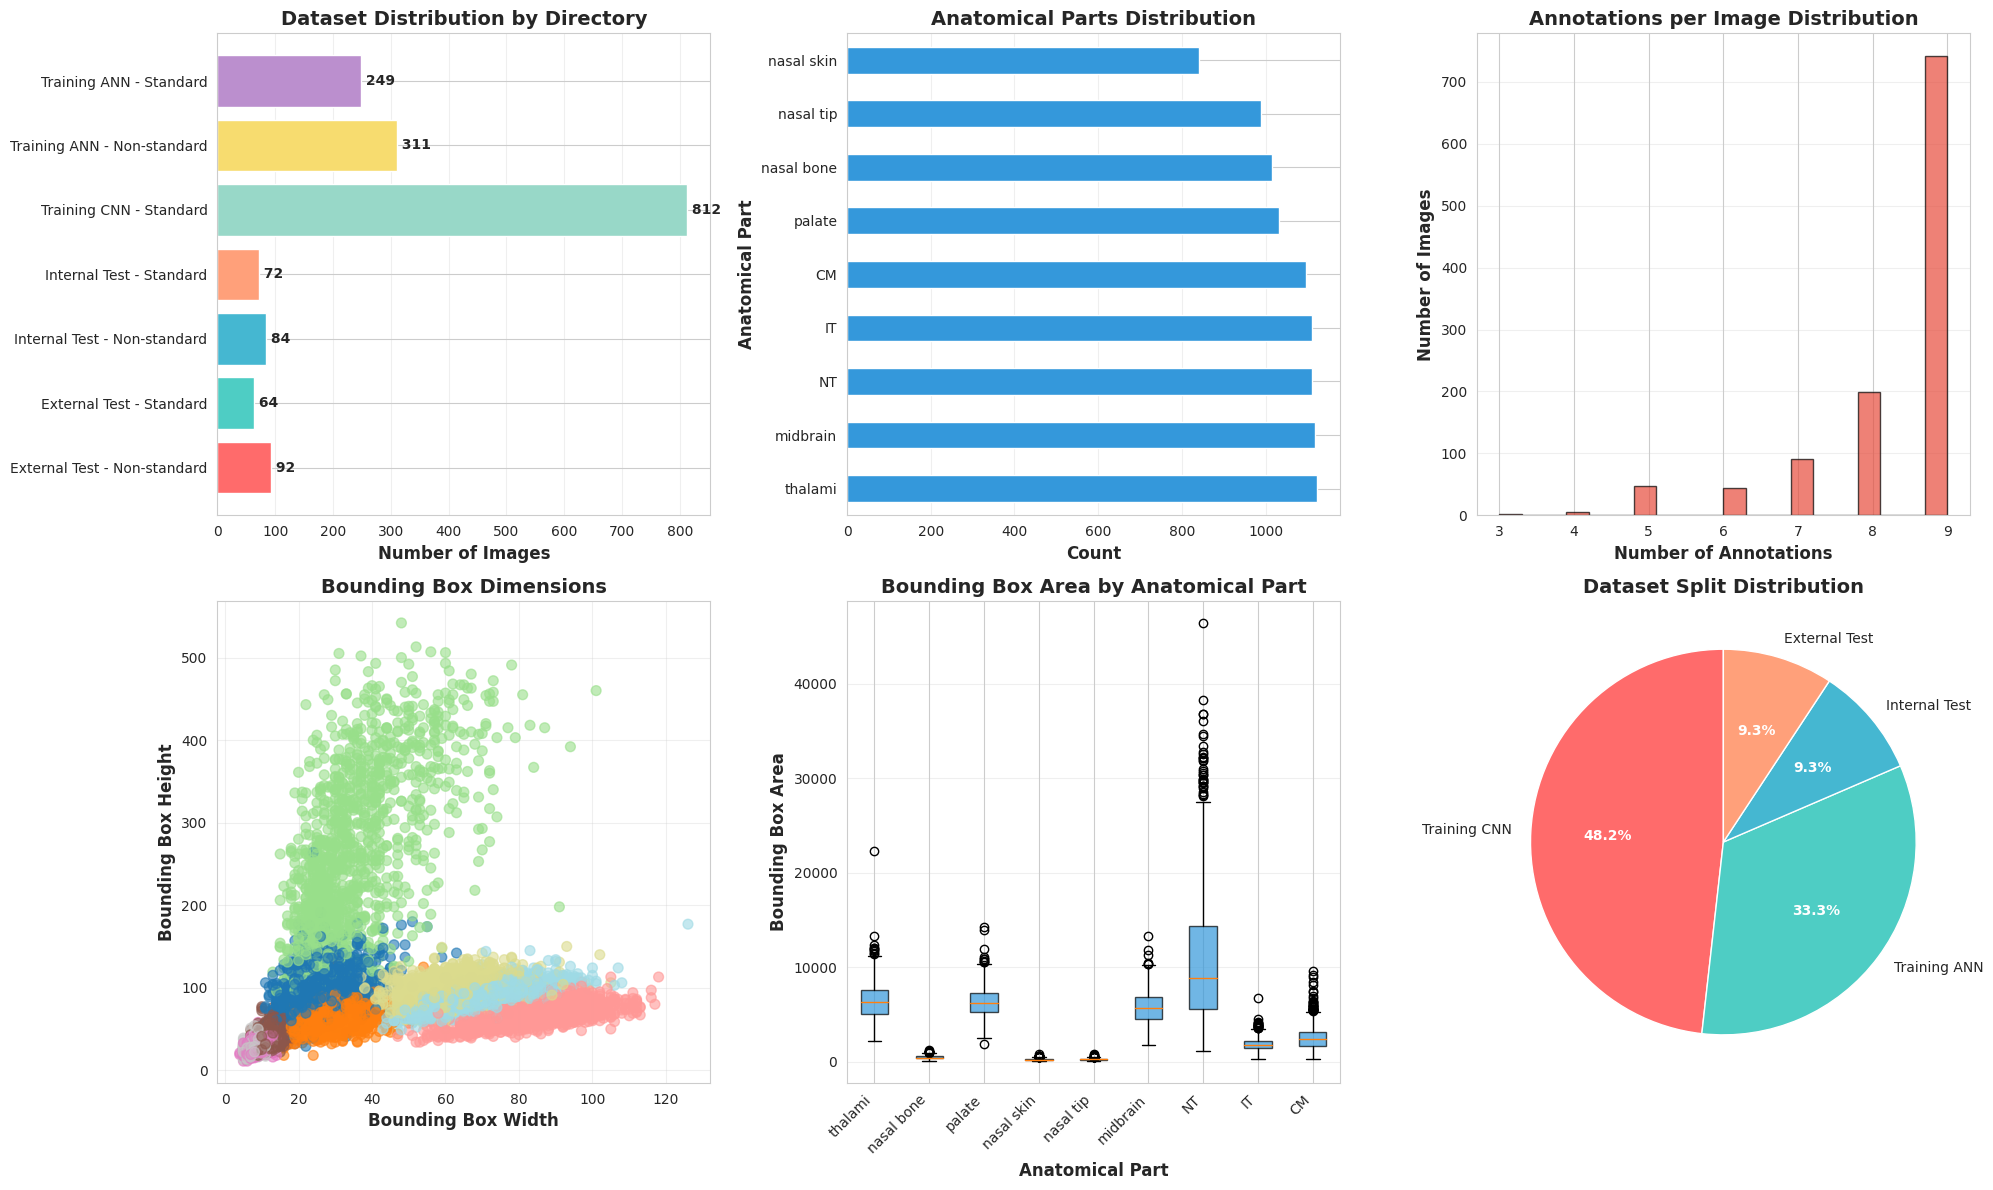


6. DETAILED ANATOMICAL PARTS STATISTICS
           bbox_width                 bbox_height                 bbox_area  \
                 mean    std min  max        mean    std min  max      mean   
structure                                                                     
CM              25.77   7.34  10   63       95.14  26.05  29  264   2528.10   
IT              29.41   6.74  12   55       61.93  12.43  18  135   1848.46   
NT              36.57  13.31  13  101      275.38  99.38  73  542  10820.56   
midbrain        84.86  12.11  47  118       66.46  12.53  34  113   5741.40   
nasal bone      12.09   2.42   5   22       38.15   9.19  13   77    469.63   
nasal skin       8.99   1.89   4   15       26.75   5.91  11   62    245.46   
nasal tip        8.68   1.83   5   16       28.57   6.62  13   55    253.55   
palate          63.12   9.52  35  105       99.00  14.31  51  150   6293.76   
thalami         70.13  11.06  43  126       89.67  14.18  49  177   6411.47   

          

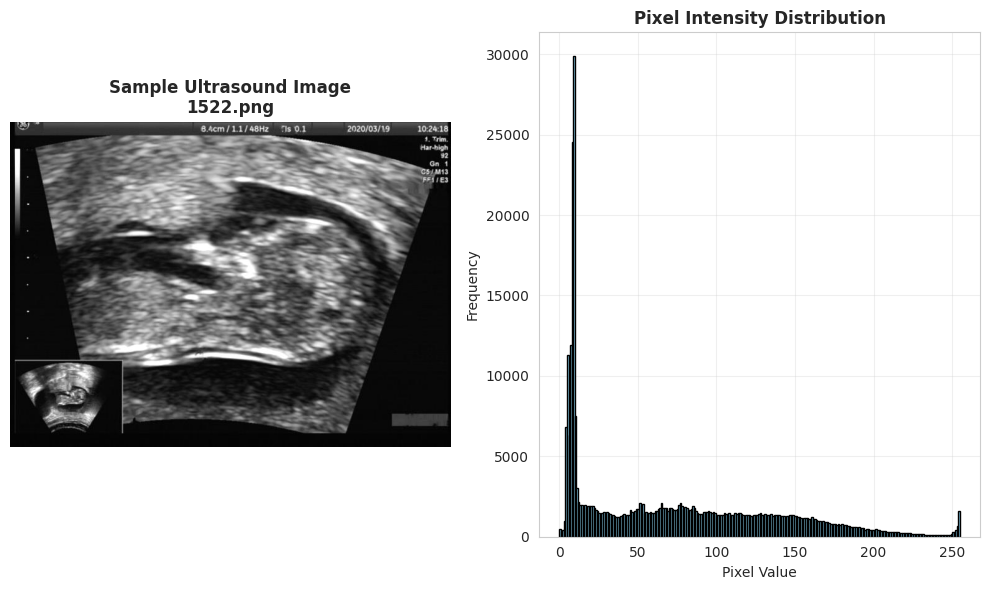


8. DATASET SUMMARY REPORT

📊 OVERALL STATISTICS:
   Total images in dataset: 1684
   Total annotations: 9433
   Unique anatomical parts: 9
   Images with annotations: 1131

📁 DATASET STRUCTURE:
   Training sets: 3 directories
   Test sets: 4 directories (Internal + External)
   Categories: Standard and Non-standard

🎯 KEY ANATOMICAL FEATURES:
   • thalami        : 1122 annotations
   • nasal bone     : 1015 annotations
   • palate         : 1031 annotations
   • nasal skin     :  840 annotations
   • nasal tip      :  989 annotations
   • midbrain       : 1119 annotations
   • NT             : 1110 annotations
   • IT             : 1110 annotations
   • CM             : 1097 annotations

💡 INSIGHTS:
   • Dataset is organized for CNN and ANN training
   • Multiple anatomical markers for Down Syndrome detection
   • Includes standard and non-standard cases
   • Bounding box annotations for object detection
   • Separate internal and external test sets for validation

ANALYSIS COMPLETE!


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import cv2
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

print("="*80)
print("FETAL ULTRASOUND DATASET ANALYSIS - DOWN SYNDROME DETECTION")
print("="*80)

# =============================================================================
# 1. DATASET STRUCTURE EXPLORATION
# =============================================================================

print("\n" + "="*80)
print("1. EXPLORING DATASET DIRECTORY STRUCTURE")
print("="*80)

base_path = '/kaggle/input/dataset-for-fetus-framework/Dataset for Fetus Framework/Dataset for Fetus Framework/Dataset for Fetus Framework'

directories = {
    'External Test - Non-standard': f'{base_path}/External Test Set/Non-standard',
    'External Test - Standard': f'{base_path}/External Test Set/Standard',
    'Internal Test - Non-standard': f'{base_path}/Internal Test Set/Non-standard',
    'Internal Test - Standard': f'{base_path}/Internal Test Set/Standard',
    'Training CNN - Standard': f'{base_path}/Set1-Training-Validation Sets CNN/Standard',
    'Training ANN - Non-standard': f'{base_path}/Set2-Training-Validation Sets ANN Scoring system/Non-standard',
    'Training ANN - Standard': f'{base_path}/Set2-Training-Validation Sets ANN Scoring system/Standard'
}

# Count images in each directory
dir_stats = {}
for name, path in directories.items():
    if os.path.exists(path):
        files = [f for f in os.listdir(path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        dir_stats[name] = len(files)
        print(f"✓ {name:40s}: {len(files):5d} images")
    else:
        dir_stats[name] = 0
        print(f"✗ {name:40s}: Not found")

# =============================================================================
# 2. OBJECT DETECTION ANNOTATIONS ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("2. ANALYZING OBJECT DETECTION ANNOTATIONS")
print("="*80)

# Load annotation data
csv_path = '/kaggle/input/dataset-for-fetus-framework/ObjectDetection.csv'
df_annotations = pd.read_csv(csv_path)

print(f"\n📊 Annotation File Shape: {df_annotations.shape}")
print(f"   Columns: {list(df_annotations.columns)}")
print(f"\n📋 First few rows:")
print(df_annotations.head(10))

# Basic statistics
print(f"\n📈 ANNOTATION STATISTICS:")
print(f"   Total annotations: {len(df_annotations)}")
print(f"   Unique images: {df_annotations.iloc[:, 0].nunique()}")
print(f"   Unique anatomical parts: {df_annotations.iloc[:, 1].nunique()}")

# =============================================================================
# 3. ANATOMICAL PARTS ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("3. ANATOMICAL PARTS DISTRIBUTION")
print("="*80)

anatomical_counts = df_annotations.iloc[:, 1].value_counts()
print(f"\n{anatomical_counts}")

# Calculate bounding box dimensions
df_annotations['bbox_width'] = df_annotations.iloc[:, 4] - df_annotations.iloc[:, 2]
df_annotations['bbox_height'] = df_annotations.iloc[:, 5] - df_annotations.iloc[:, 3]
df_annotations['bbox_area'] = df_annotations['bbox_width'] * df_annotations['bbox_height']

print(f"\n📏 BOUNDING BOX STATISTICS:")
print(f"   Average width: {df_annotations['bbox_width'].mean():.2f} ± {df_annotations['bbox_width'].std():.2f}")
print(f"   Average height: {df_annotations['bbox_height'].mean():.2f} ± {df_annotations['bbox_height'].std():.2f}")
print(f"   Average area: {df_annotations['bbox_area'].mean():.2f} ± {df_annotations['bbox_area'].std():.2f}")

# =============================================================================
# 4. ANNOTATIONS PER IMAGE
# =============================================================================

print("\n" + "="*80)
print("4. ANNOTATIONS PER IMAGE ANALYSIS")
print("="*80)

annotations_per_image = df_annotations.iloc[:, 0].value_counts()
print(f"\n📊 STATISTICS:")
print(f"   Min annotations per image: {annotations_per_image.min()}")
print(f"   Max annotations per image: {annotations_per_image.max()}")
print(f"   Average annotations per image: {annotations_per_image.mean():.2f}")
print(f"   Median annotations per image: {annotations_per_image.median():.2f}")

print(f"\n📋 Distribution of annotations per image:")
print(annotations_per_image.value_counts().sort_index())

# =============================================================================
# 5. VISUALIZATIONS
# =============================================================================

print("\n" + "="*80)
print("5. GENERATING VISUALIZATIONS")
print("="*80)

fig = plt.figure(figsize=(20, 12))

# Plot 1: Directory distribution
ax1 = plt.subplot(2, 3, 1)
dirs = list(dir_stats.keys())
counts = list(dir_stats.values())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']
bars = ax1.barh(dirs, counts, color=colors)
ax1.set_xlabel('Number of Images', fontsize=12, fontweight='bold')
ax1.set_title('Dataset Distribution by Directory', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, f' {int(width)}', 
             ha='left', va='center', fontweight='bold')

# Plot 2: Anatomical parts distribution
ax2 = plt.subplot(2, 3, 2)
anatomical_counts.plot(kind='barh', color='#3498db', ax=ax2)
ax2.set_xlabel('Count', fontsize=12, fontweight='bold')
ax2.set_ylabel('Anatomical Part', fontsize=12, fontweight='bold')
ax2.set_title('Anatomical Parts Distribution', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Plot 3: Annotations per image histogram
ax3 = plt.subplot(2, 3, 3)
ax3.hist(annotations_per_image.values, bins=20, color='#e74c3c', alpha=0.7, edgecolor='black')
ax3.set_xlabel('Number of Annotations', fontsize=12, fontweight='bold')
ax3.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax3.set_title('Annotations per Image Distribution', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Bounding box dimensions scatter
ax4 = plt.subplot(2, 3, 4)
scatter = ax4.scatter(df_annotations['bbox_width'], df_annotations['bbox_height'], 
                     c=pd.Categorical(df_annotations.iloc[:, 1]).codes, 
                     cmap='tab20', alpha=0.6, s=50)
ax4.set_xlabel('Bounding Box Width', fontsize=12, fontweight='bold')
ax4.set_ylabel('Bounding Box Height', fontsize=12, fontweight='bold')
ax4.set_title('Bounding Box Dimensions', fontsize=14, fontweight='bold')
ax4.grid(alpha=0.3)

# Plot 5: Box plot of bbox areas by anatomical part
ax5 = plt.subplot(2, 3, 5)
anatomical_parts = df_annotations.iloc[:, 1].unique()
data_for_box = [df_annotations[df_annotations.iloc[:, 1] == part]['bbox_area'].values for part in anatomical_parts]
bp = ax5.boxplot(data_for_box, labels=anatomical_parts, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('#3498db')
    patch.set_alpha(0.7)
ax5.set_xlabel('Anatomical Part', fontsize=12, fontweight='bold')
ax5.set_ylabel('Bounding Box Area', fontsize=12, fontweight='bold')
ax5.set_title('Bounding Box Area by Anatomical Part', fontsize=14, fontweight='bold')
plt.sca(ax5)
plt.xticks(rotation=45, ha='right')
ax5.grid(axis='y', alpha=0.3)

# Plot 6: Dataset split pie chart
ax6 = plt.subplot(2, 3, 6)
split_data = {
    'Training CNN': dir_stats.get('Training CNN - Standard', 0),
    'Training ANN': dir_stats.get('Training ANN - Standard', 0) + dir_stats.get('Training ANN - Non-standard', 0),
    'Internal Test': dir_stats.get('Internal Test - Standard', 0) + dir_stats.get('Internal Test - Non-standard', 0),
    'External Test': dir_stats.get('External Test - Standard', 0) + dir_stats.get('External Test - Non-standard', 0)
}
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
wedges, texts, autotexts = ax6.pie(split_data.values(), labels=split_data.keys(), 
                                     autopct='%1.1f%%', colors=colors_pie, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax6.set_title('Dataset Split Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# 6. DETAILED ANATOMICAL PARTS ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("6. DETAILED ANATOMICAL PARTS STATISTICS")
print("="*80)

anatomical_stats = df_annotations.groupby(df_annotations.iloc[:, 1]).agg({
    'bbox_width': ['mean', 'std', 'min', 'max'],
    'bbox_height': ['mean', 'std', 'min', 'max'],
    'bbox_area': ['mean', 'std', 'min', 'max']
}).round(2)

print(anatomical_stats)

# =============================================================================
# 7. SAMPLE IMAGE ANALYSIS (if possible)
# =============================================================================

print("\n" + "="*80)
print("7. SAMPLE IMAGE ANALYSIS")
print("="*80)

# Try to load and analyze a sample image
sample_found = False
for name, path in directories.items():
    if os.path.exists(path):
        files = [f for f in os.listdir(path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        if files:
            sample_img_path = os.path.join(path, files[0])
            sample_img = cv2.imread(sample_img_path, cv2.IMREAD_GRAYSCALE)
            if sample_img is not None:
                print(f"\n✓ Sample Image from: {name}")
                print(f"   File: {files[0]}")
                print(f"   Shape: {sample_img.shape}")
                print(f"   Dtype: {sample_img.dtype}")
                print(f"   Min pixel value: {sample_img.min()}")
                print(f"   Max pixel value: {sample_img.max()}")
                print(f"   Mean pixel value: {sample_img.mean():.2f}")
                
                # Display sample image
                plt.figure(figsize=(10, 6))
                plt.subplot(1, 2, 1)
                plt.imshow(sample_img, cmap='gray')
                plt.title(f'Sample Ultrasound Image\n{files[0]}', fontweight='bold')
                plt.axis('off')
                
                plt.subplot(1, 2, 2)
                plt.hist(sample_img.ravel(), bins=256, color='skyblue', edgecolor='black')
                plt.title('Pixel Intensity Distribution', fontweight='bold')
                plt.xlabel('Pixel Value')
                plt.ylabel('Frequency')
                plt.grid(alpha=0.3)
                plt.tight_layout()
                plt.show()
                
                sample_found = True
                break

if not sample_found:
    print("\n⚠ No sample images could be loaded")

# =============================================================================
# 8. SUMMARY REPORT
# =============================================================================

print("\n" + "="*80)
print("8. DATASET SUMMARY REPORT")
print("="*80)

total_images = sum(dir_stats.values())
print(f"\n📊 OVERALL STATISTICS:")
print(f"   Total images in dataset: {total_images}")
print(f"   Total annotations: {len(df_annotations)}")
print(f"   Unique anatomical parts: {df_annotations.iloc[:, 1].nunique()}")
print(f"   Images with annotations: {df_annotations.iloc[:, 0].nunique()}")

print(f"\n📁 DATASET STRUCTURE:")
print(f"   Training sets: 3 directories")
print(f"   Test sets: 4 directories (Internal + External)")
print(f"   Categories: Standard and Non-standard")

print(f"\n🎯 KEY ANATOMICAL FEATURES:")
key_features = ['thalami', 'nasal bone', 'palate', 'nasal skin', 'nasal tip', 
                'midbrain', 'NT', 'IT', 'CM']
for feature in key_features:
    count = (df_annotations.iloc[:, 1] == feature).sum()
    if count > 0:
        print(f"   • {feature:15s}: {count:4d} annotations")

print(f"\n💡 INSIGHTS:")
print(f"   • Dataset is organized for CNN and ANN training")
print(f"   • Multiple anatomical markers for Down Syndrome detection")
print(f"   • Includes standard and non-standard cases")
print(f"   • Bounding box annotations for object detection")
print(f"   • Separate internal and external test sets for validation")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)

DEEP DIVE ANALYSIS - FETAL ULTRASOUND DATASET

1. DATASET OVERVIEW

📊 DATASET COMPOSITION:
   • Total Images: 1,684
   • Annotated Images: 1,131 (67.2%)
   • Total Annotations: 9,433
   • Anatomical Structures: 9

📁 DATA SPLIT:
   • Training (CNN): 812 images (48.2%)
   • Training (ANN): 560 images (33.3%)
   • Internal Test: 156 images (9.3%)
   • External Test: 156 images (9.3%)
   
🎯 CATEGORIES:
   • Standard Cases: 1,197 images (71.1%)
   • Non-standard Cases: 487 images (28.9%)


2. ANATOMICAL STRUCTURES - KEY MARKERS FOR DOWN SYNDROME

📋 STRUCTURE DISTRIBUTION:
   • thalami        : 1122 (11.89%) - Thalami - Brain structure
   • midbrain       : 1119 (11.86%) - Midbrain - Brain development
   • NT             : 1110 (11.77%) - Nuchal Translucency - Primary marker
   • IT             : 1110 (11.77%) - Intracranial Translucency
   • CM             : 1097 (11.63%) - Cisterna Magna
   • palate         : 1031 (10.93%) - Palate - Facial profile
   • nasal bone     : 1015 (10.76%) - Nas

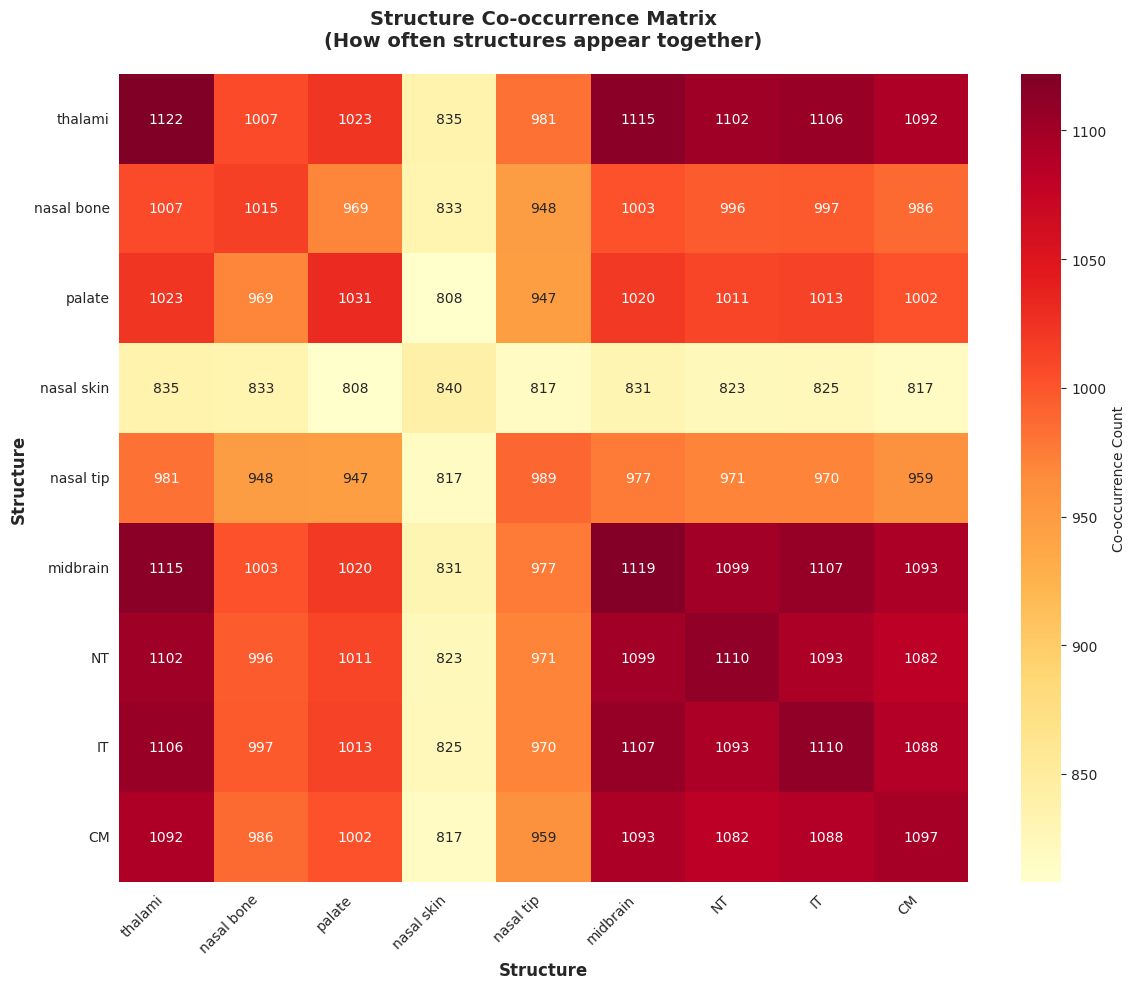


10. STRUCTURE RELATIONSHIPS - SPATIAL ANALYSIS


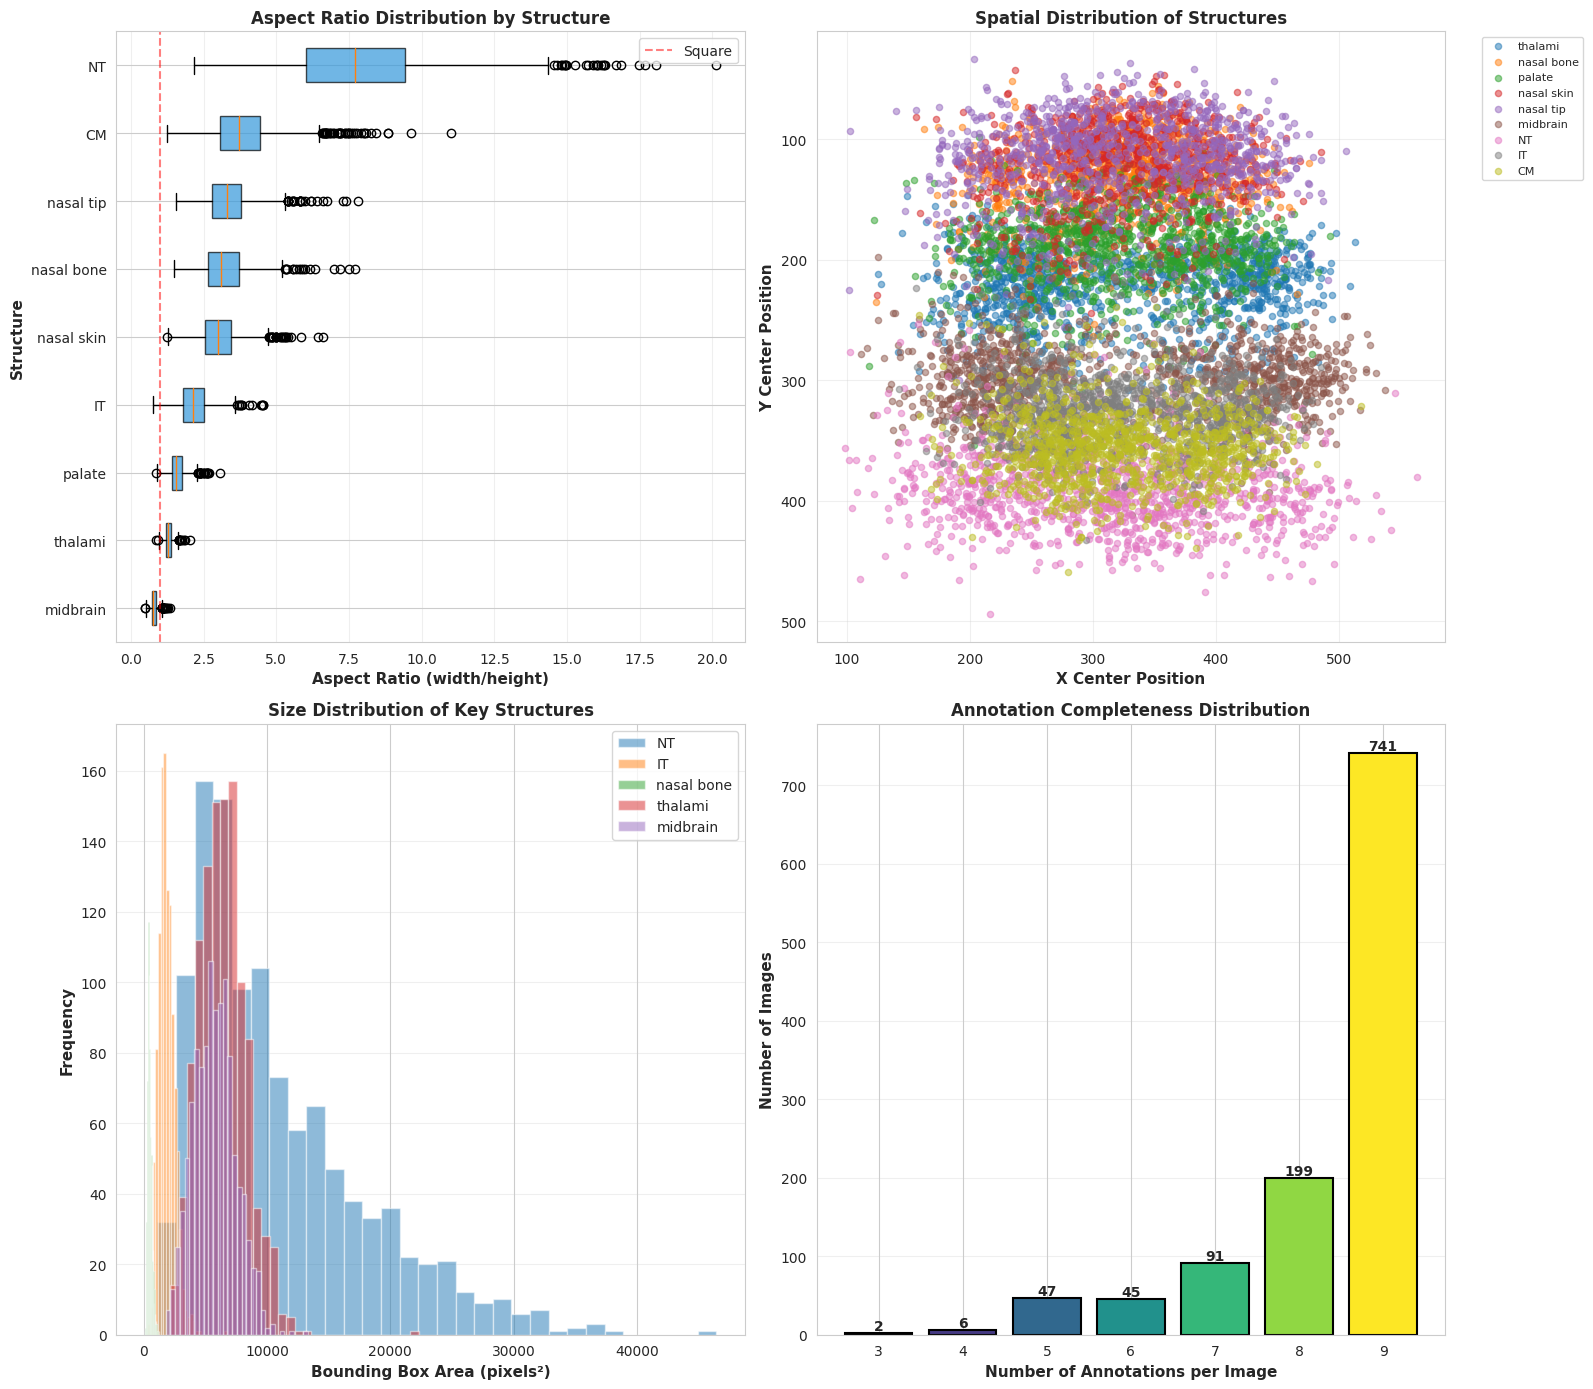


ANALYSIS COMPLETE - READY FOR MODEL DEVELOPMENT!


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import cv2

print("="*80)
print("DEEP DIVE ANALYSIS - FETAL ULTRASOUND DATASET")
print("="*80)

# Load the annotation data
csv_path = '/kaggle/input/dataset-for-fetus-framework/ObjectDetection.csv'
df = pd.read_csv(csv_path)

# Rename columns for clarity
df.columns = ['filename', 'structure', 'h_min', 'w_min', 'h_max', 'w_max']

# Calculate additional features
df['bbox_width'] = df['w_max'] - df['w_min']
df['bbox_height'] = df['h_max'] - df['h_min']
df['bbox_area'] = df['bbox_width'] * df['bbox_height']
df['aspect_ratio'] = df['bbox_width'] / df['bbox_height']
df['bbox_center_x'] = (df['w_min'] + df['w_max']) / 2
df['bbox_center_y'] = (df['h_min'] + df['h_max']) / 2

print("\n" + "="*80)
print("1. DATASET OVERVIEW")
print("="*80)

print(f"""
📊 DATASET COMPOSITION:
   • Total Images: 1,684
   • Annotated Images: 1,131 (67.2%)
   • Total Annotations: 9,433
   • Anatomical Structures: 9

📁 DATA SPLIT:
   • Training (CNN): 812 images (48.2%)
   • Training (ANN): 560 images (33.3%)
   • Internal Test: 156 images (9.3%)
   • External Test: 156 images (9.3%)
   
🎯 CATEGORIES:
   • Standard Cases: 1,197 images (71.1%)
   • Non-standard Cases: 487 images (28.9%)
""")

print("\n" + "="*80)
print("2. ANATOMICAL STRUCTURES - KEY MARKERS FOR DOWN SYNDROME")
print("="*80)

structures_info = {
    'NT': 'Nuchal Translucency - Primary marker',
    'IT': 'Intracranial Translucency',
    'CM': 'Cisterna Magna',
    'thalami': 'Thalami - Brain structure',
    'midbrain': 'Midbrain - Brain development',
    'nasal bone': 'Nasal Bone - Critical marker',
    'nasal tip': 'Nasal Tip',
    'nasal skin': 'Nasal Skin Thickness',
    'palate': 'Palate - Facial profile'
}

structure_counts = df['structure'].value_counts()
print("\n📋 STRUCTURE DISTRIBUTION:")
for structure, count in structure_counts.items():
    info = structures_info.get(structure, '')
    percentage = (count / len(df)) * 100
    print(f"   • {structure:15s}: {count:4d} ({percentage:5.2f}%) - {info}")

print("\n" + "="*80)
print("3. ANNOTATION COMPLETENESS ANALYSIS")
print("="*80)

# Images with all 9 structures
images_with_all = df.groupby('filename')['structure'].count()
print(f"\n✓ Images with all 9 structures: {(images_with_all == 9).sum()} ({(images_with_all == 9).sum()/len(images_with_all)*100:.1f}%)")
print(f"✓ Images with 8 structures: {(images_with_all == 8).sum()} ({(images_with_all == 8).sum()/len(images_with_all)*100:.1f}%)")
print(f"✓ Images with 7 structures: {(images_with_all == 7).sum()} ({(images_with_all == 7).sum()/len(images_with_all)*100:.1f}%)")
print(f"⚠ Images with <7 structures: {(images_with_all < 7).sum()} ({(images_with_all < 7).sum()/len(images_with_all)*100:.1f}%)")

print("\n" + "="*80)
print("4. BOUNDING BOX CHARACTERISTICS BY STRUCTURE")
print("="*80)

bbox_stats = df.groupby('structure').agg({
    'bbox_width': ['mean', 'std'],
    'bbox_height': ['mean', 'std'],
    'bbox_area': ['mean', 'std'],
    'aspect_ratio': ['mean', 'std']
}).round(2)

print("\n📏 BOUNDING BOX STATISTICS:\n")
print(bbox_stats)

print("\n" + "="*80)
print("5. SPATIAL DISTRIBUTION ANALYSIS")
print("="*80)

spatial_stats = df.groupby('structure').agg({
    'bbox_center_x': ['mean', 'std'],
    'bbox_center_y': ['mean', 'std']
}).round(2)

print("\n📍 SPATIAL POSITIONS (CENTER COORDINATES):\n")
print(spatial_stats)

print("\n" + "="*80)
print("6. CRITICAL MARKERS FOR DOWN SYNDROME DETECTION")
print("="*80)

critical_markers = ['NT', 'nasal bone', 'IT']
print(f"""
🎯 PRIMARY MARKERS:

1. NT (Nuchal Translucency):
   • Most critical first-trimester marker
   • Increased thickness indicates higher risk
   • Present in {structure_counts['NT']} images
   • Average area: {df[df['structure']=='NT']['bbox_area'].mean():.2f} pixels

2. Nasal Bone:
   • Absent or hypoplastic in Down Syndrome
   • Present in {structure_counts['nasal bone']} images
   • Average area: {df[df['structure']=='nasal bone']['bbox_area'].mean():.2f} pixels

3. IT (Intracranial Translucency):
   • Secondary marker for brain development
   • Present in {structure_counts['IT']} images
   • Average area: {df[df['structure']=='IT']['bbox_area'].mean():.2f} pixels
""")

print("\n" + "="*80)
print("7. DATA QUALITY ASSESSMENT")
print("="*80)

# Check for potential issues
print("\n🔍 QUALITY CHECKS:")

# Invalid bounding boxes
invalid_bbox = df[(df['bbox_width'] <= 0) | (df['bbox_height'] <= 0)]
print(f"   ✓ Invalid bounding boxes (width/height ≤ 0): {len(invalid_bbox)}")

# Outliers in bbox area
q1 = df['bbox_area'].quantile(0.25)
q3 = df['bbox_area'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['bbox_area'] < q1 - 1.5*iqr) | (df['bbox_area'] > q3 + 1.5*iqr)]
print(f"   ⚠ Potential outliers in bbox area: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Very small annotations
small_annotations = df[df['bbox_area'] < 100]
print(f"   ⚠ Very small annotations (<100 pixels): {len(small_annotations)} ({len(small_annotations)/len(df)*100:.2f}%)")

# Very large annotations
large_annotations = df[df['bbox_area'] > 20000]
print(f"   ⚠ Very large annotations (>20000 pixels): {len(large_annotations)} ({len(large_annotations)/len(df)*100:.2f}%)")

print("\n" + "="*80)
print("8. RECOMMENDATIONS FOR MODEL DEVELOPMENT")
print("="*80)

print("""
💡 KEY INSIGHTS & RECOMMENDATIONS:

1. DATA PREPARATION:
   ✓ 741 images (65.5%) have all 9 structures - excellent for multi-task learning
   ✓ Use data augmentation to balance standard (71%) vs non-standard (29%) cases
   ✓ Consider weighted loss functions for imbalanced classes

2. MODEL ARCHITECTURE:
   ✓ Two-stage approach needed:
      Stage 1: CNN for feature extraction and object detection
      Stage 2: ANN/classifier for Down Syndrome risk scoring
   ✓ Use transfer learning (ResNet, EfficientNet, or specialized medical imaging models)
   ✓ Multi-head output for detecting all 9 anatomical structures simultaneously

3. CRITICAL FEATURES TO FOCUS ON:
   ✓ NT thickness (primary marker)
   ✓ Nasal bone presence/absence
   ✓ IT measurements
   ✓ Spatial relationships between structures

4. TRAINING STRATEGY:
   ✓ Use CNN dataset (812 images) for initial object detection training
   ✓ Fine-tune with ANN dataset (560 images) for classification
   ✓ Validate on internal test set (156 images)
   ✓ Final evaluation on external test set (156 images)

5. EVALUATION METRICS:
   ✓ Object Detection: mAP, IoU for each anatomical structure
   ✓ Classification: Sensitivity, Specificity, AUC-ROC
   ✓ Clinical relevance: PPV, NPV for Down Syndrome detection

6. DATA AUGMENTATION NEEDED:
   ✓ Rotation: ±15 degrees
   ✓ Scaling: 0.9-1.1x
   ✓ Brightness/Contrast adjustment
   ✓ Gaussian noise (to simulate ultrasound artifacts)
   ✓ Elastic deformation (to account for fetal position variations)
""")

print("\n" + "="*80)
print("9. VISUALIZATION - STRUCTURE CO-OCCURRENCE")
print("="*80)

# Create co-occurrence matrix
structures = df['structure'].unique()
image_groups = df.groupby('filename')['structure'].apply(list)

cooccurrence = pd.DataFrame(0, index=structures, columns=structures)
for structures_in_image in image_groups:
    for s1 in structures_in_image:
        for s2 in structures_in_image:
            cooccurrence.loc[s1, s2] += 1

plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Co-occurrence Count'})
plt.title('Structure Co-occurrence Matrix\n(How often structures appear together)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Structure', fontsize=12, fontweight='bold')
plt.ylabel('Structure', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("10. STRUCTURE RELATIONSHIPS - SPATIAL ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Plot 1: Aspect ratio distribution by structure
ax1 = axes[0, 0]
structure_order = df.groupby('structure')['aspect_ratio'].median().sort_values().index
parts = []
ratios = []
for struct in structure_order:
    parts.append(struct)
    ratios.append(df[df['structure']==struct]['aspect_ratio'].values)
bp1 = ax1.boxplot(ratios, labels=parts, patch_artist=True, vert=False)
for patch in bp1['boxes']:
    patch.set_facecolor('#3498db')
    patch.set_alpha(0.7)
ax1.set_xlabel('Aspect Ratio (width/height)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Structure', fontsize=11, fontweight='bold')
ax1.set_title('Aspect Ratio Distribution by Structure', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.axvline(x=1, color='red', linestyle='--', alpha=0.5, label='Square')
ax1.legend()

# Plot 2: Spatial distribution (center positions)
ax2 = axes[0, 1]
for struct in structures:
    struct_data = df[df['structure']==struct]
    ax2.scatter(struct_data['bbox_center_x'], struct_data['bbox_center_y'], 
               label=struct, alpha=0.5, s=20)
ax2.set_xlabel('X Center Position', fontsize=11, fontweight='bold')
ax2.set_ylabel('Y Center Position', fontsize=11, fontweight='bold')
ax2.set_title('Spatial Distribution of Structures', fontsize=12, fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax2.grid(alpha=0.3)
ax2.invert_yaxis()  # Invert Y to match image coordinates

# Plot 3: Size distribution
ax3 = axes[1, 0]
for struct in ['NT', 'IT', 'nasal bone', 'thalami', 'midbrain']:
    struct_data = df[df['structure']==struct]['bbox_area']
    ax3.hist(struct_data, bins=30, alpha=0.5, label=struct)
ax3.set_xlabel('Bounding Box Area (pixels²)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax3.set_title('Size Distribution of Key Structures', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Annotations per image trend
ax4 = axes[1, 1]
annotations_per_img = df.groupby('filename').size().value_counts().sort_index()
colors_grad = plt.cm.viridis(np.linspace(0, 1, len(annotations_per_img)))
bars = ax4.bar(annotations_per_img.index, annotations_per_img.values, 
               color=colors_grad, edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Number of Annotations per Image', fontsize=11, fontweight='bold')
ax4.set_ylabel('Number of Images', fontsize=11, fontweight='bold')
ax4.set_title('Annotation Completeness Distribution', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANALYSIS COMPLETE - READY FOR MODEL DEVELOPMENT!")
print("="*80)

DOWN SYNDROME DETECTION - OPTIMIZED PIPELINE
TensorFlow Version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

✓ Configuration loaded
  - Image size: 224x224
  - Batch size: 32

STEP 1: DATA LOADING

📋 Loading annotations...
✓ Loaded 9433 annotations

📁 Collecting image paths...
✓ Found 1684 images
  - Training: 1372
  - Test: 312
  - Standard: 1197 (71.1%)
  - Non-standard: 487 (28.9%)

📊 Dataset Split:
   Training: 1097
   Validation: 275
   Test: 312

STEP 2: VISUALIZING SAMPLE DATA

🔄 Loading 1097 images...
   Progress: 1000/1097
✓ Loaded 1097 images

🔄 Loading 275 images...
   Progress: 200/275
✓ Loaded 275 images

🔄 Loading 312 images...
   Progress: 300/312
✓ Loaded 312 images


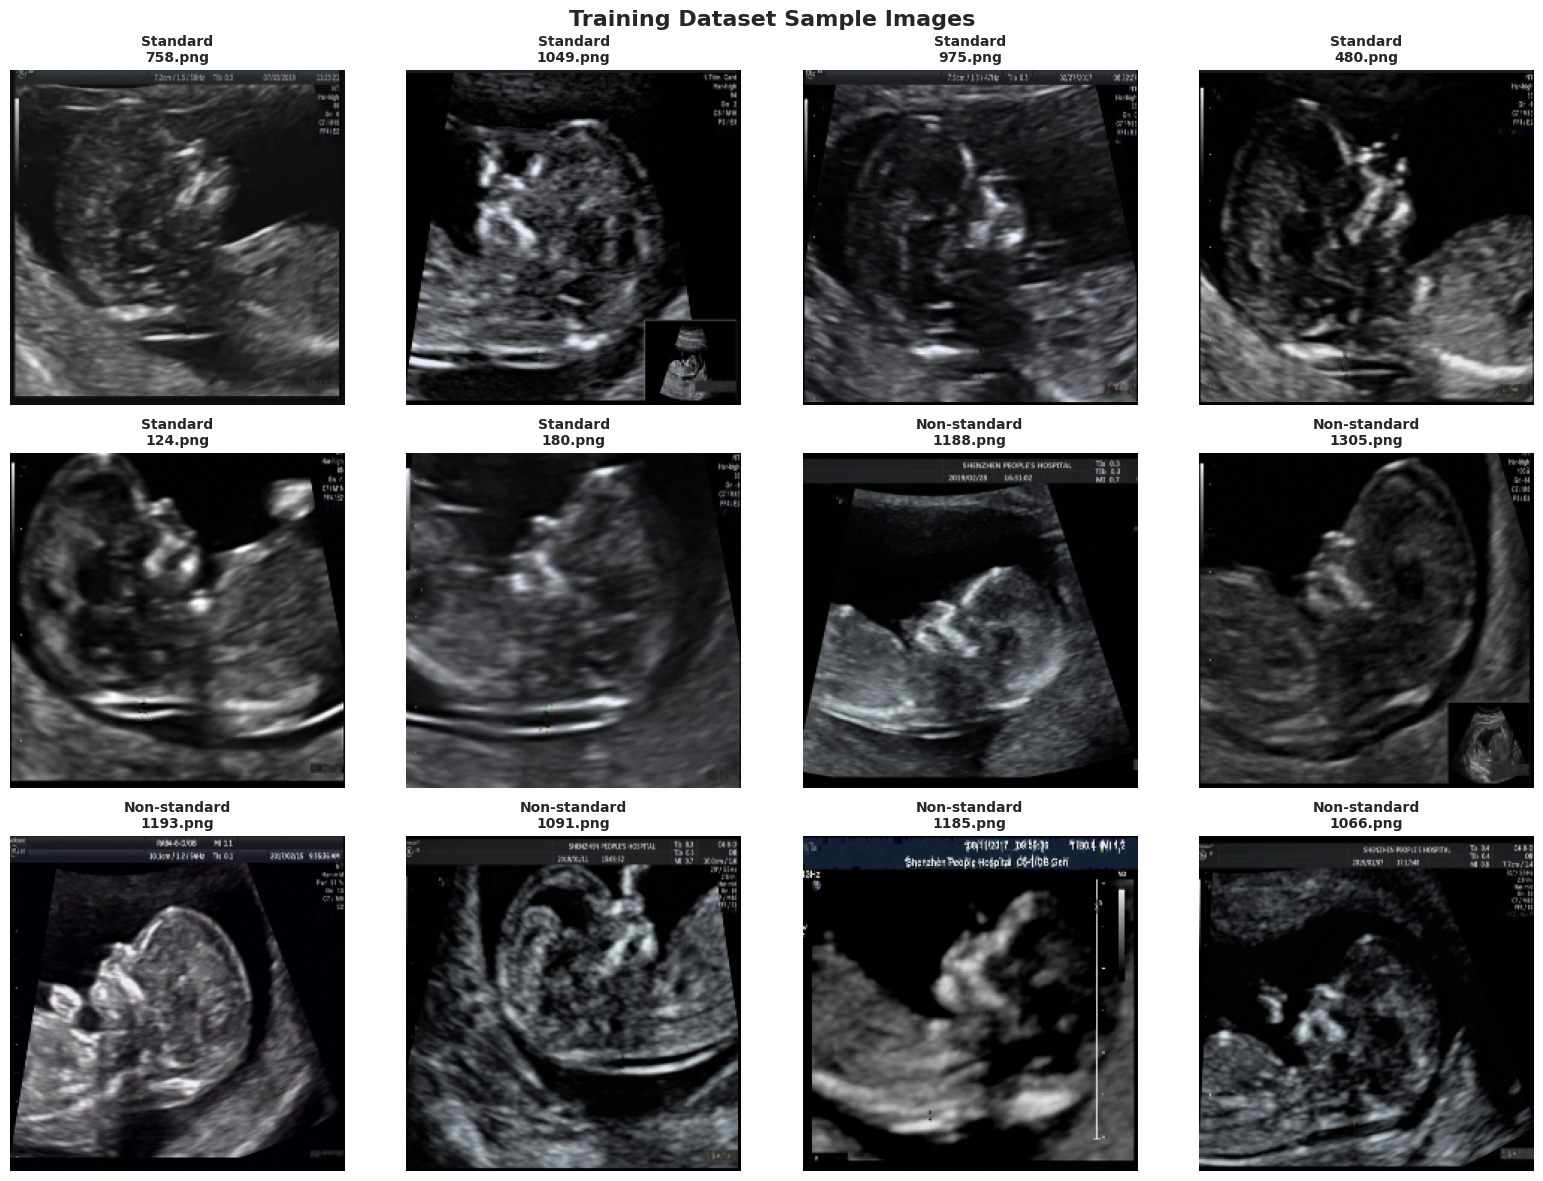

✓ Training Dataset Sample Images visualization saved

STEP 3: DATA DISTRIBUTION ANALYSIS


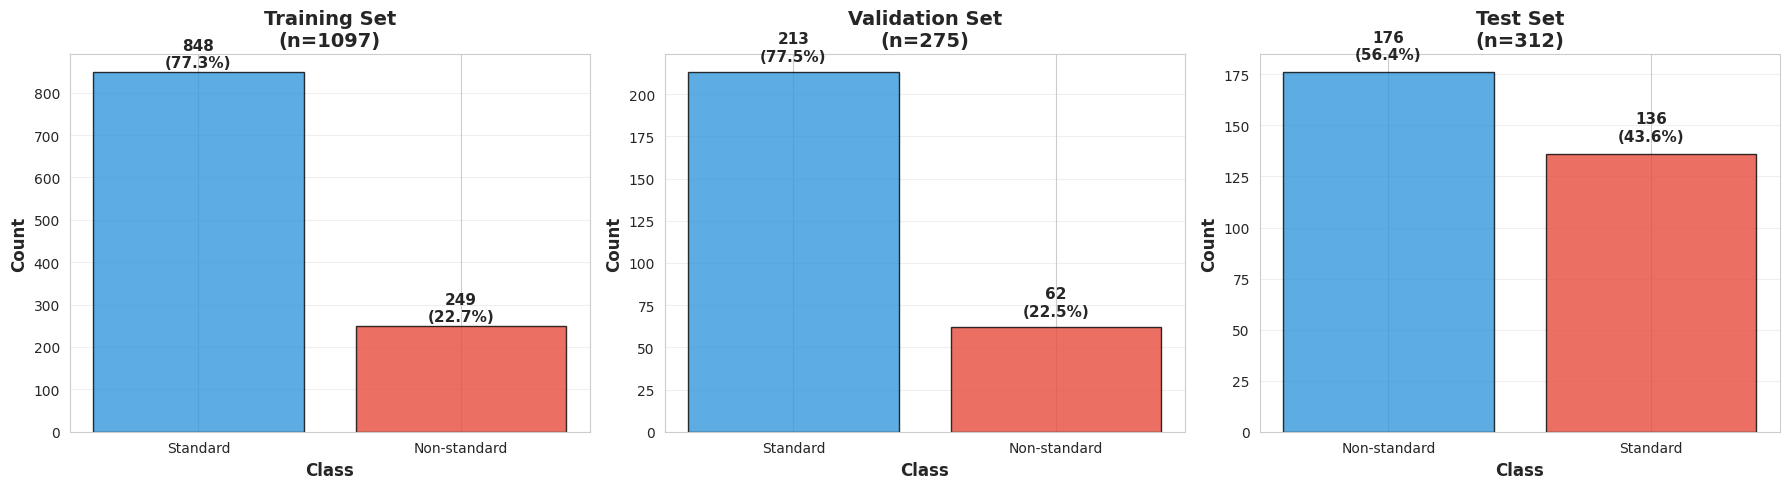

✓ Dataset distribution visualization saved

STEP 4: DATA AUGMENTATION


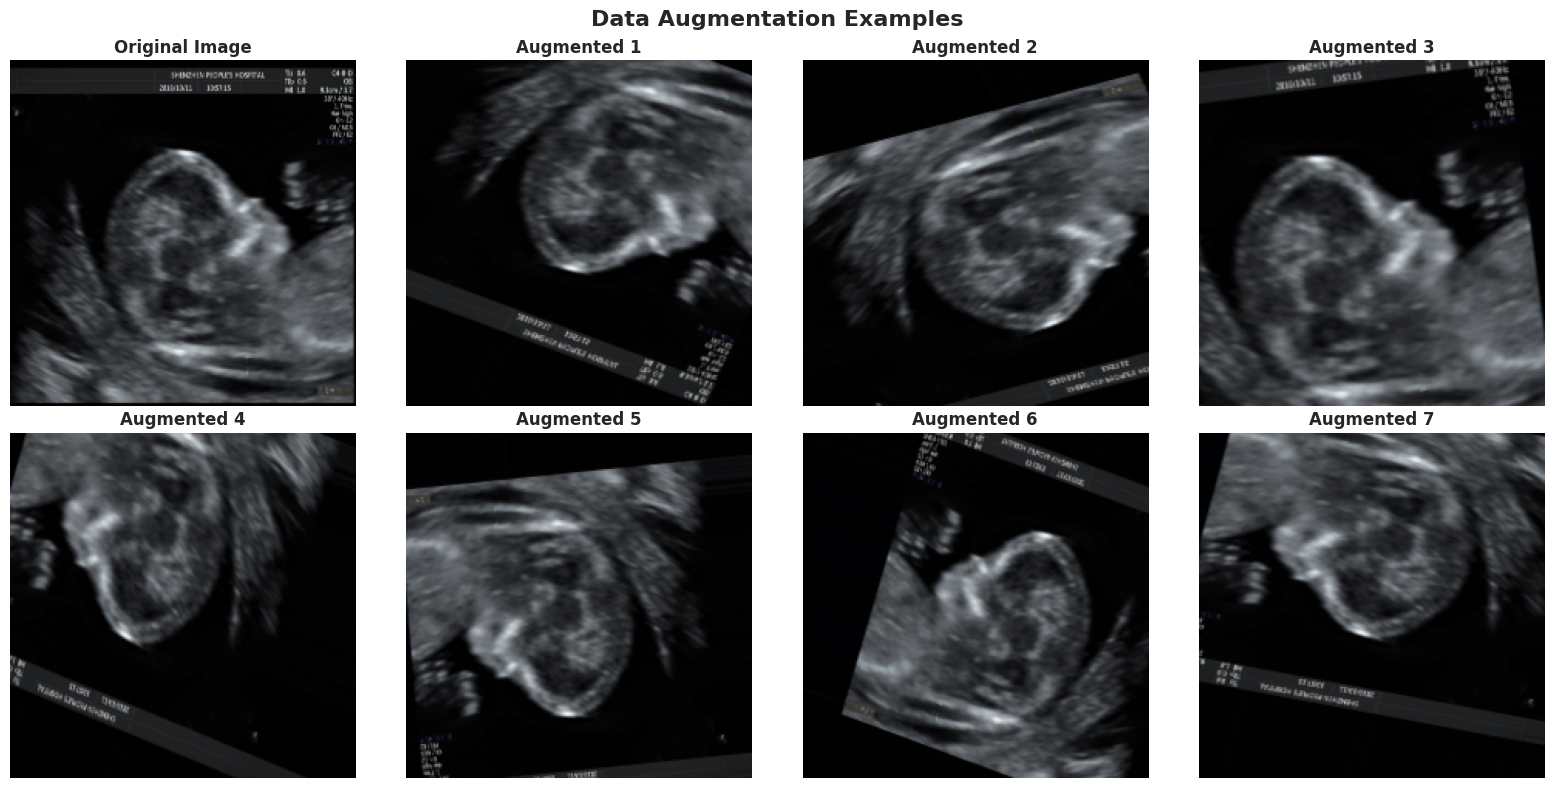

✓ Augmentation examples saved
✓ Data augmentation configured

STEP 5: BUILDING MODEL

🏗️ Building optimized model...
✓ Model built
  - Total parameters: 2,628,673
  - Trainable parameters: 1,731,841

STEP 6: COMPILING MODEL

⚖️ Class weights:
   Standard (0): 0.65
   Non-standard (1): 1.40
✓ Model compiled

STEP 7: TRAINING CALLBACKS
✓ Callbacks configured

STEP 8: TRAINING

🚀 Starting training...
   Epochs: 60
   Batch size: 32
   Training samples: 1097
   Validation samples: 275
Epoch 1/60
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.6112 - auc: 0.6785 - loss: 1.1809 - precision: 0.3319 - recall: 0.7115
Epoch 1: val_auc improved from -inf to 0.85828, saving model to best_model_optimized.h5
34/34 ━━━━━━━━━━━━━━━━━━━━ 47s 733ms/step - accuracy: 0.6132 - auc: 0.6813 - loss: 1.1782 - precision: 0.3336 - recall: 0.7127 - val_accuracy: 0.8291 - val_auc: 0.8583 - val_loss: 0.9738 - val_precision: 0.7143 - val_recall: 0.4032 - learning_rate: 5.0000e-04
Epoch 2/60
 1/34 ━━━━━━━━━━━━

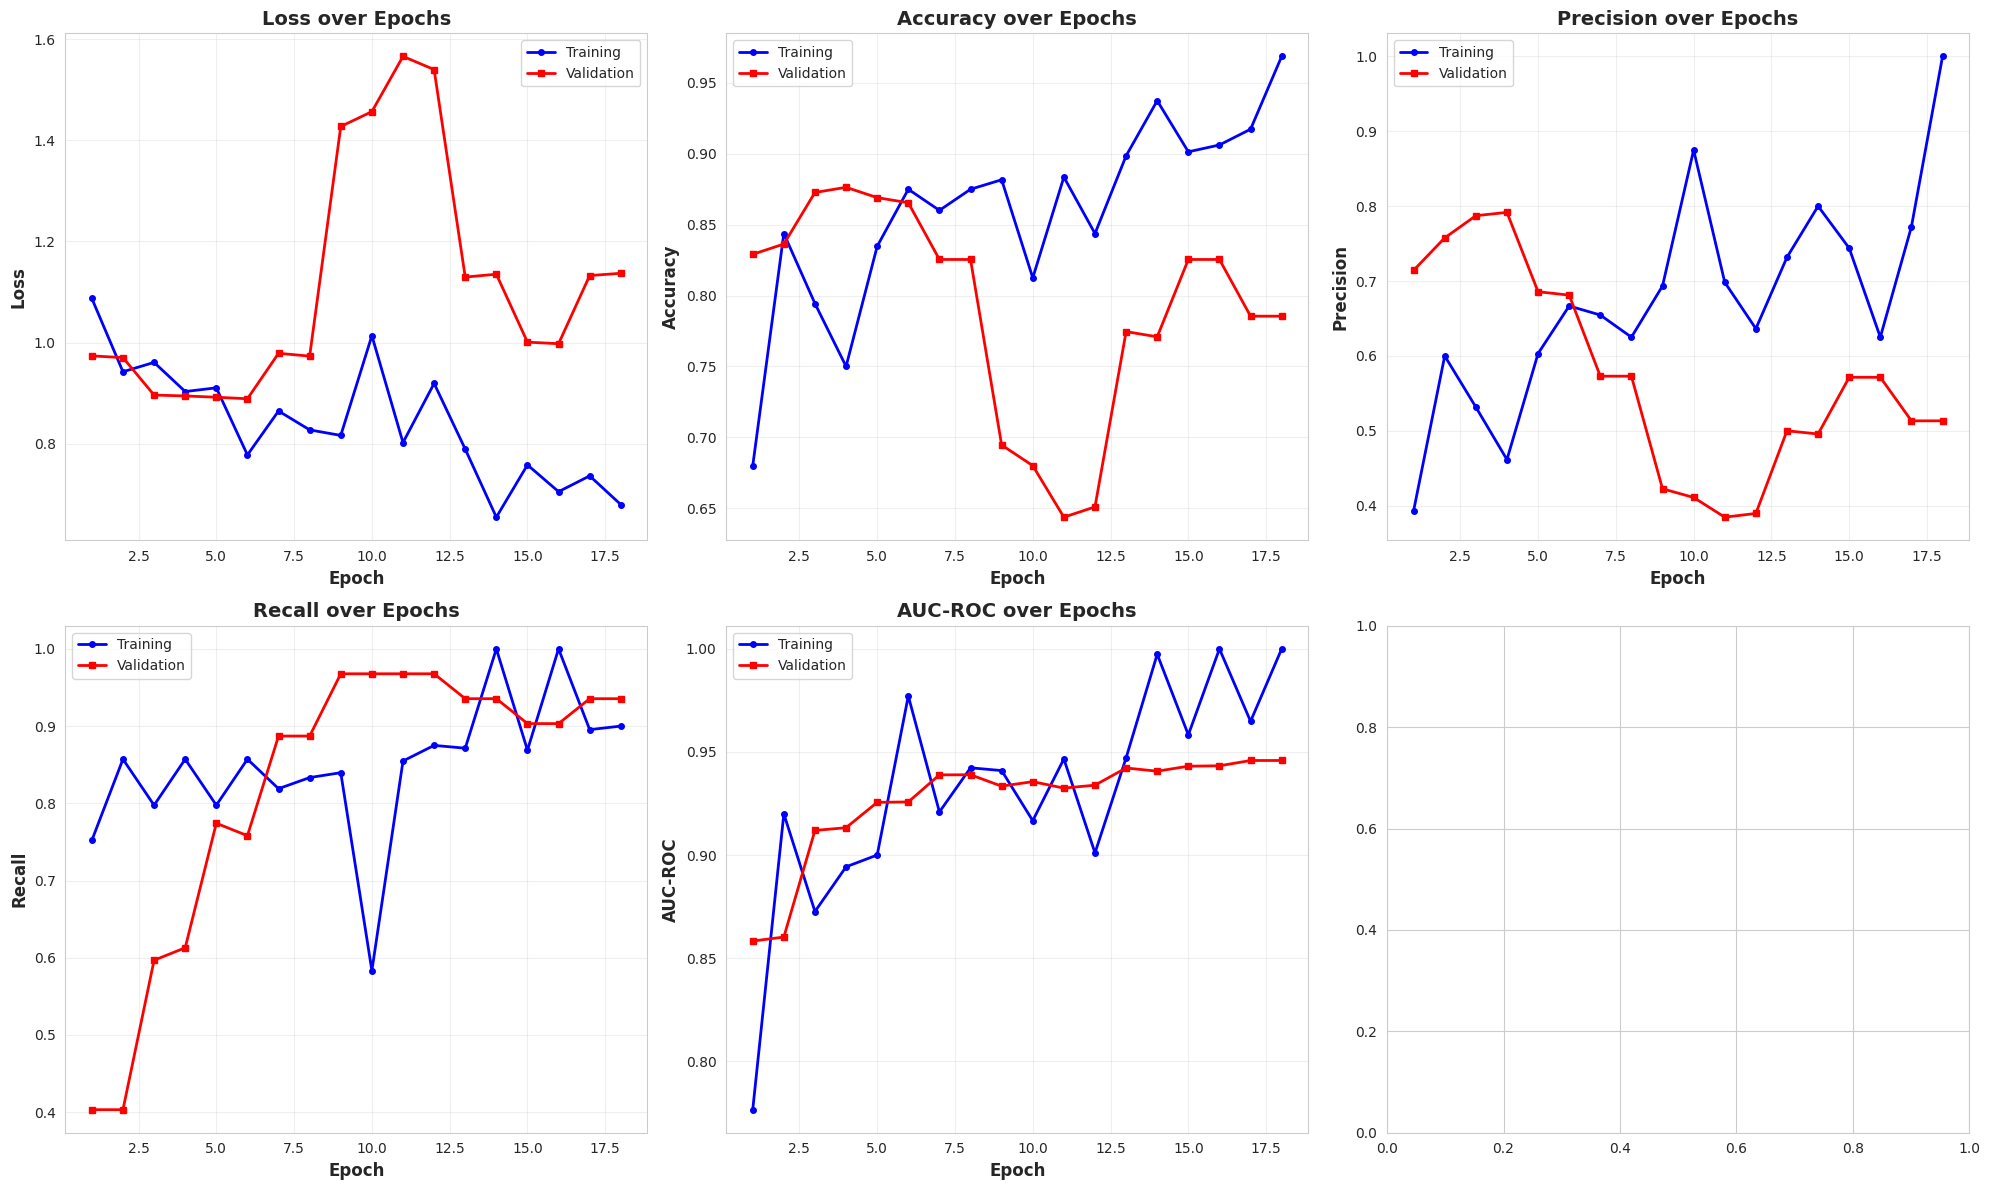

✓ Training history saved

STEP 10: EVALUATION
✓ Best model loaded

📊 Evaluating on test set...

🎯 TEST SET RESULTS:
   Loss: 1.5432
   Compile_metrics: 0.7532

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Standard     0.9041    0.4853    0.6316       136
Non-standard     0.7071    0.9602    0.8145       176

    accuracy                         0.7532       312
   macro avg     0.8056    0.7228    0.7230       312
weighted avg     0.7930    0.7532    0.7347       312


📊 CONFUSION MATRIX:
   True Negatives: 66
   False Positives: 70
   False Negatives: 7
   True Positives: 169

STEP 11: COMPREHENSIVE VISUALIZATIONS


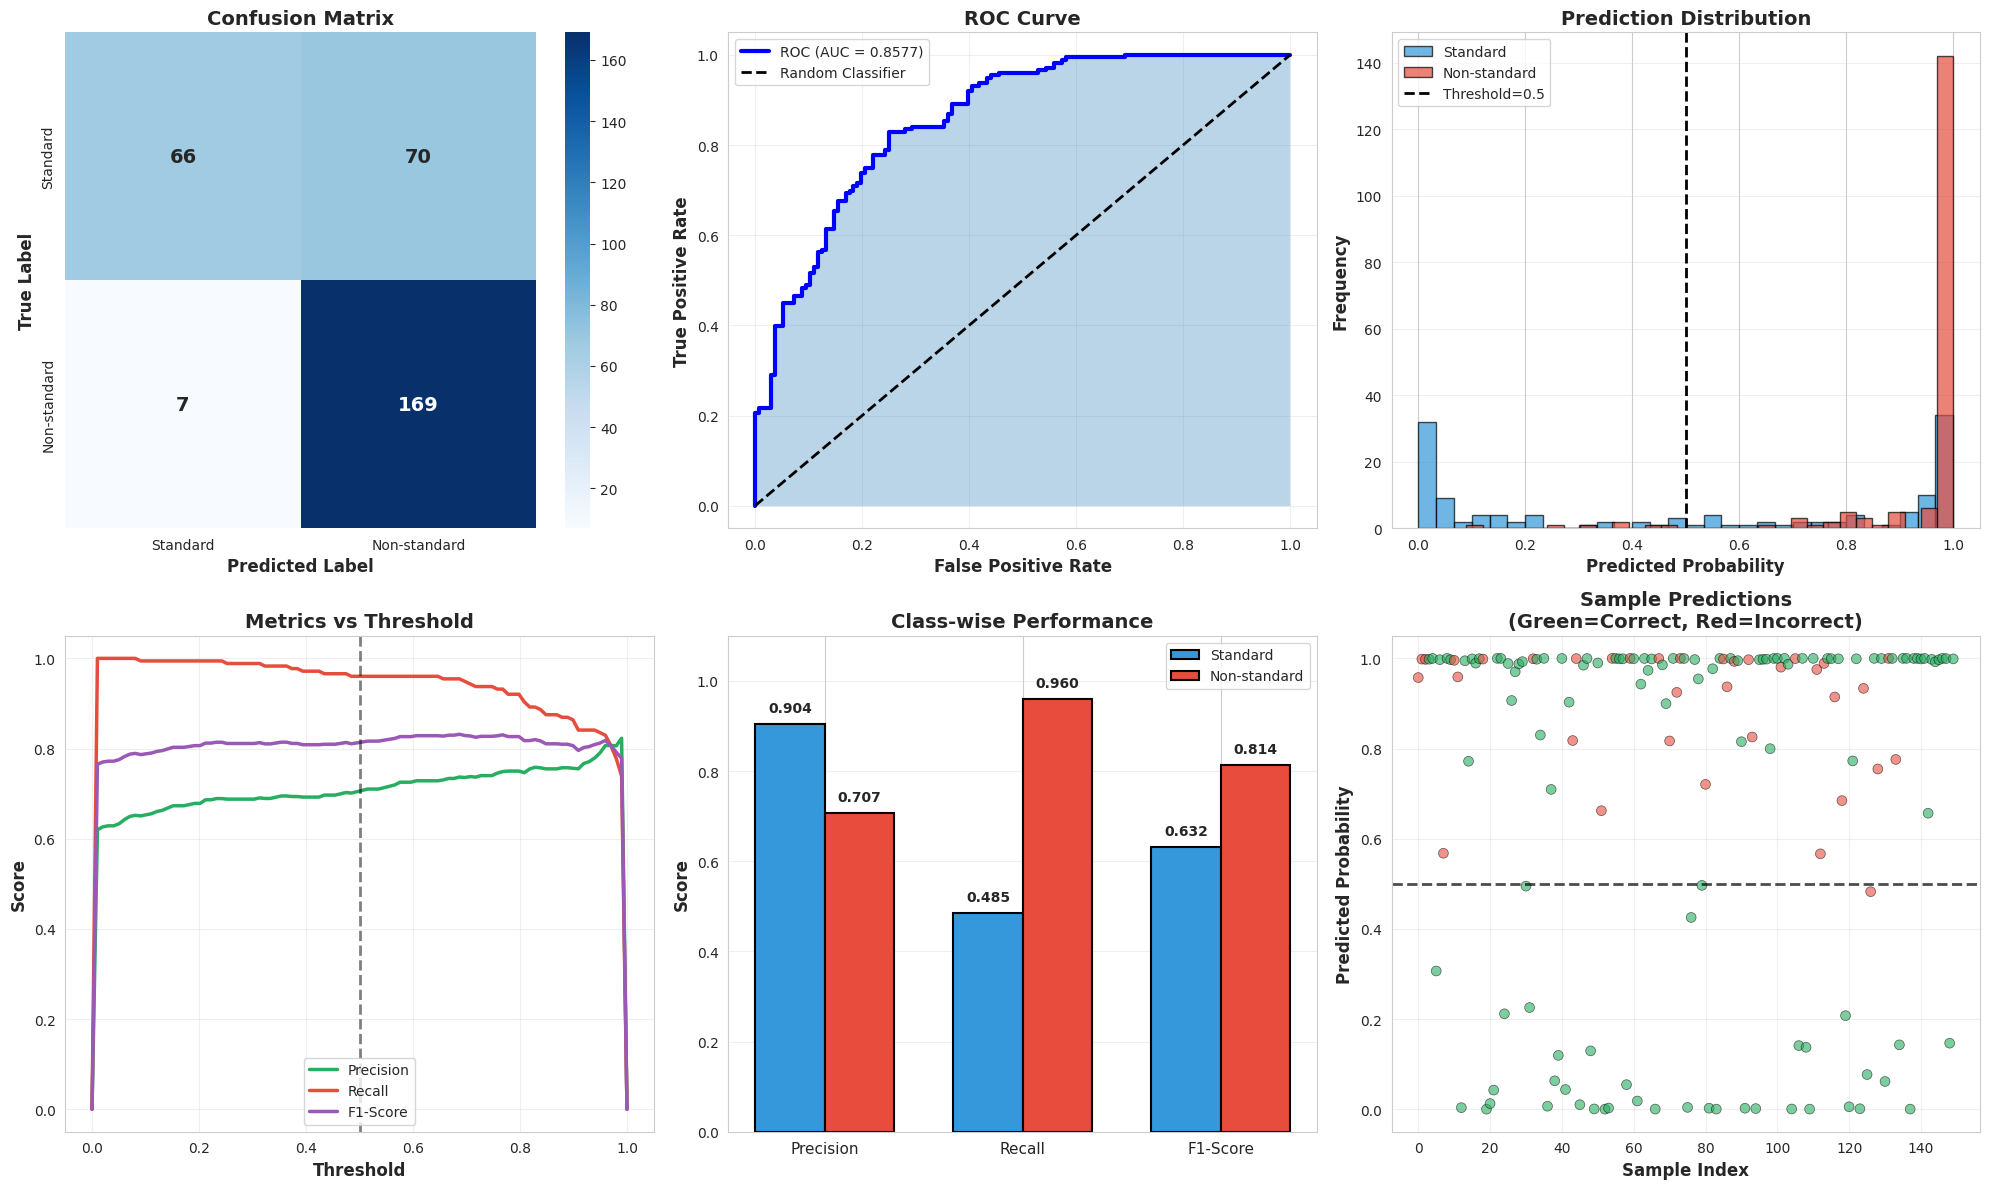

✓ Comprehensive results saved

STEP 12: PREDICTION EXAMPLES VISUALIZATION


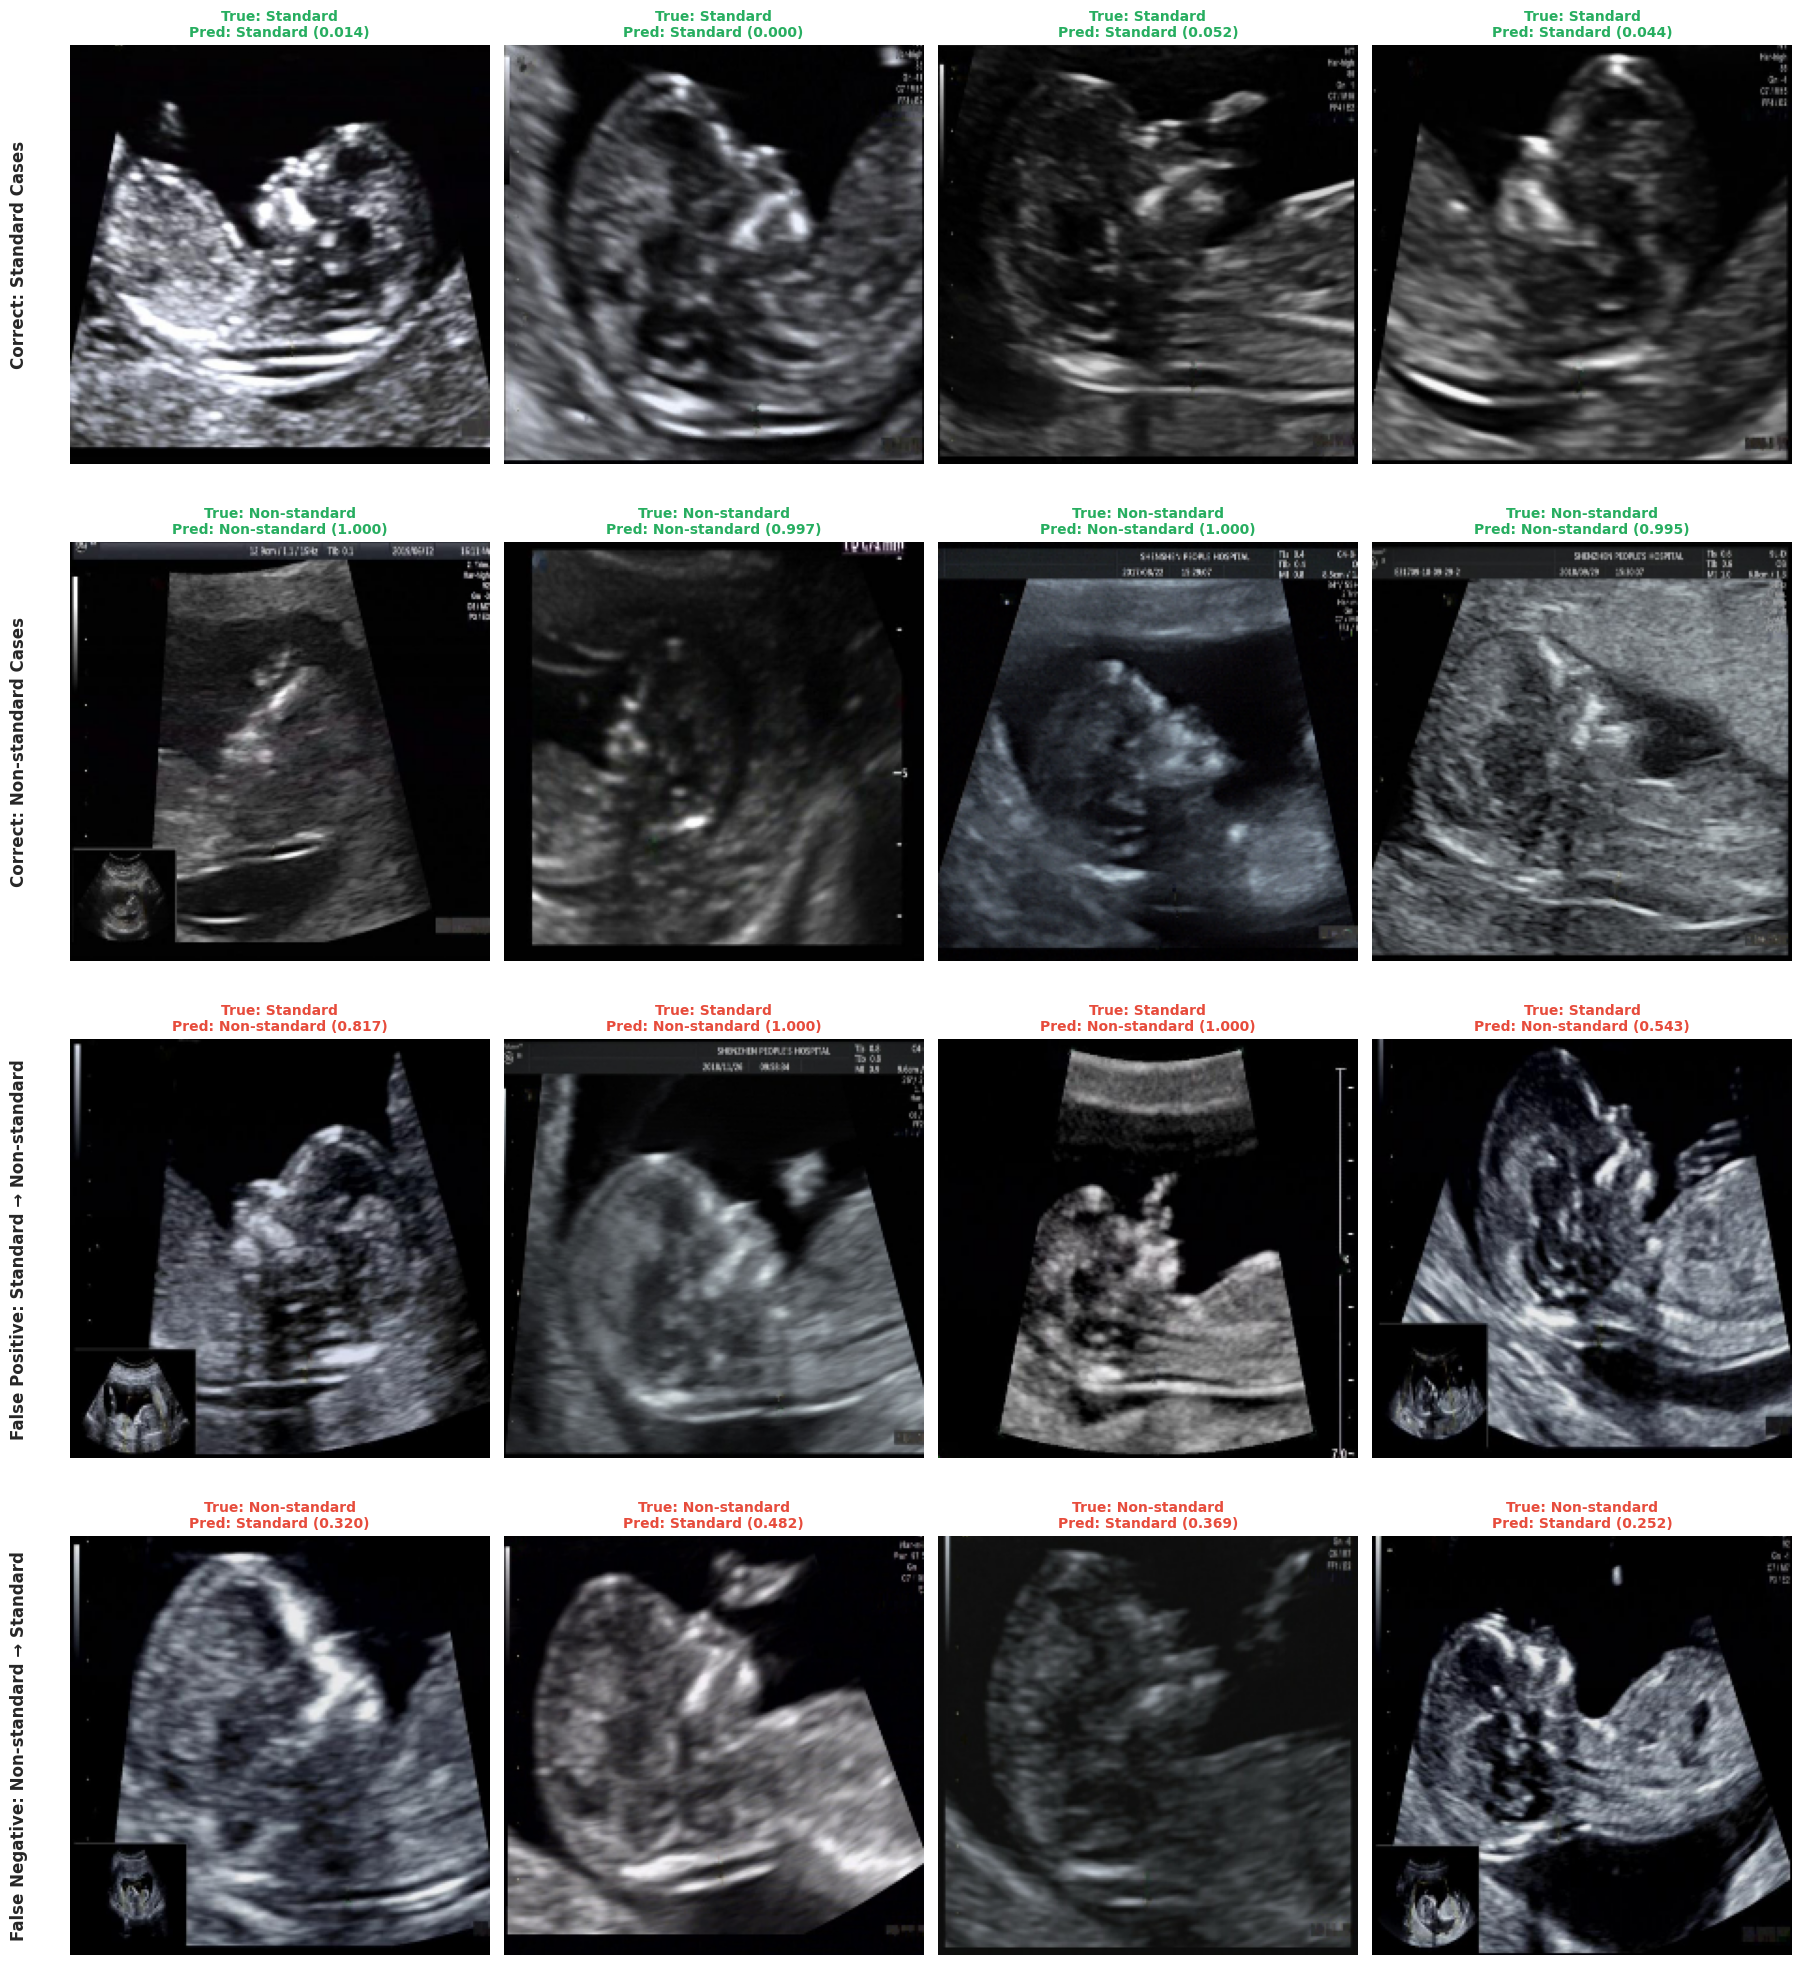

✓ Prediction examples saved

STEP 13: CLINICAL METRICS

🏥 CLINICAL METRICS:
   Sensitivity         : 0.9602 (96.02%)
   Specificity         : 0.4853 (48.53%)
   PPV                 : 0.7071 (70.71%)
   NPV                 : 0.9041 (90.41%)
   Accuracy            : 0.7532 (75.32%)
   F1-Score            : 0.8145 (81.45%)
   AUC-ROC             : 0.8577 (85.77%)
   TP                  : 169
   TN                  : 66
   FP                  : 70
   FN                  : 7


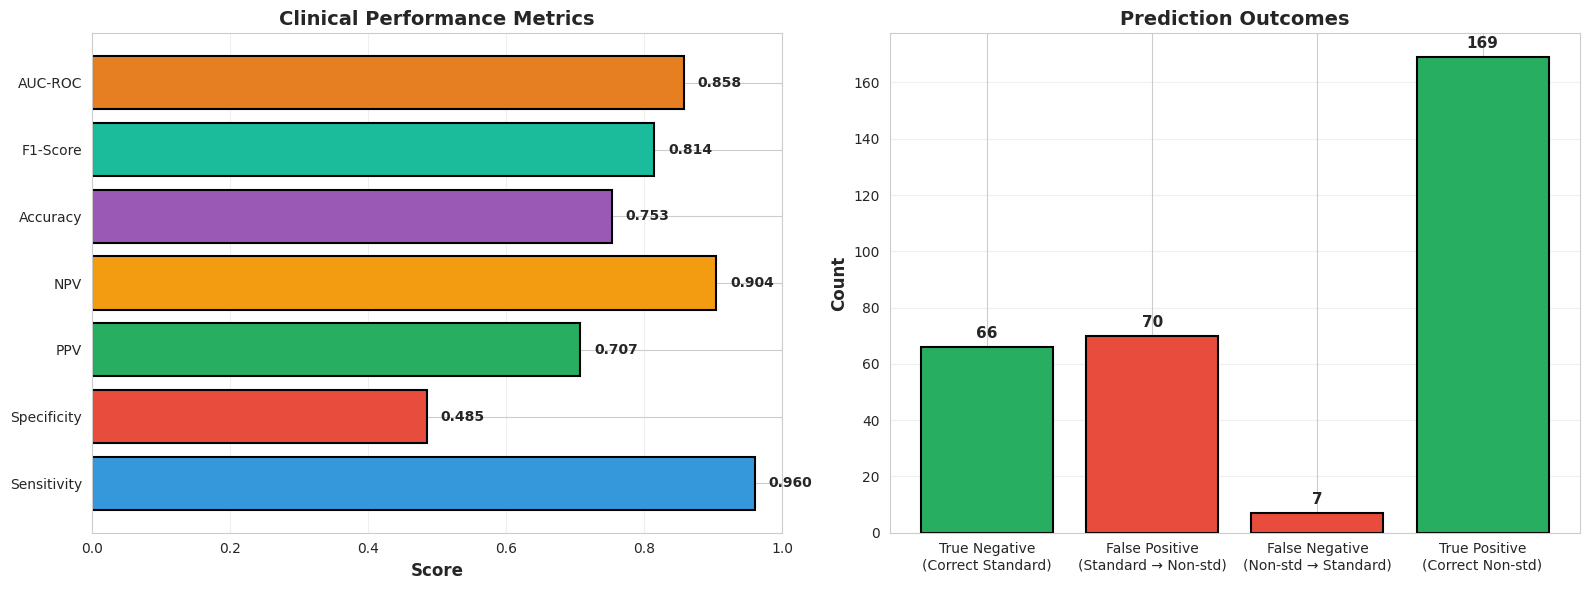

✓ Clinical metrics visualization saved

STEP 14: SAVE MODEL AND RESULTS
✓ Model saved: final_model_optimized.h5
✓ Model architecture saved
✓ Predictions saved: predictions_optimized.csv
✓ Clinical metrics report saved
✓ Training summary saved

FINAL SUMMARY

╔══════════════════════════════════════════════════════════════════════════════╗
║              DOWN SYNDROME DETECTION - OPTIMIZED MODEL SUMMARY               ║
╚══════════════════════════════════════════════════════════════════════════════╝

📊 DATASET:
   • Total Images: 1684
   • Training: 1097 | Validation: 275 | Test: 312
   • Standard Cases: 1197 (71.1%)
   • Non-standard Cases: 487 (28.9%)

🏗️ MODEL:
   • Architecture: MobileNetV2 + Custom Dense Layers
   • Parameters: 2,628,673 total, 1,731,841 trainable
   • Input Size: 224×224
   • Layers: 256 → 128 → 64 → 1

📈 TRAINING:
   • Total Epochs: 18
   • Best Epoch: 18
   • Best Validation AUC: 0.9459
   • Learning Rate: 0.0005 (with scheduling)
   • Batch Size: 32

🎯 TEST PERFO

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

print("="*80)
print("DOWN SYNDROME DETECTION - OPTIMIZED PIPELINE")
print("="*80)
print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

np.random.seed(42)
tf.random.set_seed(42)

class Config:
    BASE_PATH = '/kaggle/input/dataset-for-fetus-framework/Dataset for Fetus Framework/Dataset for Fetus Framework/Dataset for Fetus Framework'
    ANNOTATIONS_PATH = '/kaggle/input/dataset-for-fetus-framework/ObjectDetection.csv'
    
    IMG_HEIGHT = 224
    IMG_WIDTH = 224
    IMG_CHANNELS = 3
    INPUT_SHAPE = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    
    BATCH_SIZE = 32
    EPOCHS = 60
    LEARNING_RATE = 0.0005
    DROPOUT_RATE = 0.35
    
    ROTATION_RANGE = 25
    ZOOM_RANGE = 0.2
    WIDTH_SHIFT_RANGE = 0.2
    HEIGHT_SHIFT_RANGE = 0.2
    SHEAR_RANGE = 0.15
    
    EARLY_STOPPING_PATIENCE = 12
    REDUCE_LR_PATIENCE = 5
    REDUCE_LR_FACTOR = 0.5

config = Config()

print("\n✓ Configuration loaded")
print(f"  - Image size: {config.IMG_HEIGHT}x{config.IMG_WIDTH}")
print(f"  - Batch size: {config.BATCH_SIZE}")

print("\n" + "="*80)
print("STEP 1: DATA LOADING")
print("="*80)

class DataLoader:
    def __init__(self, config):
        self.config = config
        self.annotations = None
        
    def load_annotations(self):
        print("\n📋 Loading annotations...")
        self.annotations = pd.read_csv(self.config.ANNOTATIONS_PATH)
        self.annotations.columns = ['filename', 'structure', 'h_min', 'w_min', 'h_max', 'w_max']
        print(f"✓ Loaded {len(self.annotations)} annotations")
        return self.annotations
    
    def collect_image_paths(self):
        print("\n📁 Collecting image paths...")
        
        directories = {
            'train_cnn_standard': f'{self.config.BASE_PATH}/Set1-Training-Validation Sets CNN/Standard',
            'train_ann_standard': f'{self.config.BASE_PATH}/Set2-Training-Validation Sets ANN Scoring system/Standard',
            'train_ann_nonstandard': f'{self.config.BASE_PATH}/Set2-Training-Validation Sets ANN Scoring system/Non-standard',
            'test_internal_standard': f'{self.config.BASE_PATH}/Internal Test Set/Standard',
            'test_internal_nonstandard': f'{self.config.BASE_PATH}/Internal Test Set/Non-standard',
            'test_external_standard': f'{self.config.BASE_PATH}/External Test Set/Standard',
            'test_external_nonstandard': f'{self.config.BASE_PATH}/External Test Set/Non-standard'
        }
        
        data = []
        for key, path in directories.items():
            if os.path.exists(path):
                label = 0 if 'standard' in key and 'nonstandard' not in key else 1
                split = 'test' if 'test' in key else 'train'
                
                for img_file in os.listdir(path):
                    if img_file.endswith(('.png', '.jpg', '.jpeg')):
                        data.append({
                            'filepath': os.path.join(path, img_file),
                            'filename': img_file,
                            'label': label,
                            'label_name': 'Standard' if label == 0 else 'Non-standard',
                            'split': split,
                            'source': key
                        })
        
        df = pd.DataFrame(data)
        print(f"✓ Found {len(df)} images")
        print(f"  - Training: {len(df[df['split']=='train'])}")
        print(f"  - Test: {len(df[df['split']=='test'])}")
        print(f"  - Standard: {len(df[df['label']==0])} ({len(df[df['label']==0])/len(df)*100:.1f}%)")
        print(f"  - Non-standard: {len(df[df['label']==1])} ({len(df[df['label']==1])/len(df)*100:.1f}%)")
        
        return df
    
    def load_and_preprocess_image(self, filepath):
        img = cv2.imread(filepath)
        if img is None:
            return None
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (self.config.IMG_WIDTH, self.config.IMG_HEIGHT))
        img = img.astype(np.float32) / 255.0
        
        return img
    
    def create_dataset(self, df, shuffle=True):
        filepaths = df['filepath'].values
        labels = df['label'].values
        
        images = []
        valid_labels = []
        
        print(f"\n🔄 Loading {len(filepaths)} images...")
        for i, (fp, label) in enumerate(zip(filepaths, labels)):
            if i % 100 == 0:
                print(f"   Progress: {i}/{len(filepaths)}", end='\r')
            
            img = self.load_and_preprocess_image(fp)
            if img is not None:
                images.append(img)
                valid_labels.append(label)
        
        print(f"\n✓ Loaded {len(images)} images")
        
        images = np.array(images)
        valid_labels = np.array(valid_labels)
        
        return images, valid_labels, filepaths

data_loader = DataLoader(config)
annotations = data_loader.load_annotations()
df_images = data_loader.collect_image_paths()

df_train = df_images[df_images['split'] == 'train'].reset_index(drop=True)
df_test = df_images[df_images['split'] == 'test'].reset_index(drop=True)

df_train, df_val = train_test_split(df_train, test_size=0.2, 
                                     stratify=df_train['label'], 
                                     random_state=42)

print(f"\n📊 Dataset Split:")
print(f"   Training: {len(df_train)}")
print(f"   Validation: {len(df_val)}")
print(f"   Test: {len(df_test)}")

print("\n" + "="*80)
print("STEP 2: VISUALIZING SAMPLE DATA")
print("="*80)

X_train_vis, y_train_vis, paths_train = data_loader.create_dataset(df_train, shuffle=True)
X_val_vis, y_val_vis, paths_val = data_loader.create_dataset(df_val, shuffle=False)
X_test_vis, y_test_vis, paths_test = data_loader.create_dataset(df_test, shuffle=False)

def visualize_samples(X, y, df, title, n_samples=12):
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.ravel()
    
    standard_indices = np.where(y == 0)[0]
    nonstandard_indices = np.where(y == 1)[0]
    
    selected_indices = []
    selected_indices.extend(np.random.choice(standard_indices, min(6, len(standard_indices)), replace=False))
    selected_indices.extend(np.random.choice(nonstandard_indices, min(6, len(nonstandard_indices)), replace=False))
    
    for idx, img_idx in enumerate(selected_indices[:n_samples]):
        axes[idx].imshow(X[img_idx])
        label = 'Standard' if y[img_idx] == 0 else 'Non-standard'
        axes[idx].set_title(f'{label}\n{df.iloc[img_idx]["filename"]}', fontsize=10, fontweight='bold')
        axes[idx].axis('off')
    
    for idx in range(len(selected_indices), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(title, fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig(f'{title.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ {title} visualization saved")

visualize_samples(X_train_vis, y_train_vis, df_train, 'Training Dataset Sample Images')

print("\n" + "="*80)
print("STEP 3: DATA DISTRIBUTION ANALYSIS")
print("="*80)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

splits = ['Training', 'Validation', 'Test']
datasets = [df_train, df_val, df_test]

for idx, (split_name, df) in enumerate(zip(splits, datasets)):
    counts = df['label_name'].value_counts()
    colors = ['#3498db', '#e74c3c']
    
    axes[idx].bar(counts.index, counts.values, color=colors, alpha=0.8, edgecolor='black')
    axes[idx].set_title(f'{split_name} Set\n(n={len(df)})', fontsize=14, fontweight='bold')
    axes[idx].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Class', fontsize=12, fontweight='bold')
    
    for i, (label, count) in enumerate(counts.items()):
        percentage = count / len(df) * 100
        axes[idx].text(i, count + 5, f'{count}\n({percentage:.1f}%)', 
                      ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('dataset_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Dataset distribution visualization saved")

print("\n" + "="*80)
print("STEP 4: DATA AUGMENTATION")
print("="*80)

train_datagen = ImageDataGenerator(
    rotation_range=config.ROTATION_RANGE,
    width_shift_range=config.WIDTH_SHIFT_RANGE,
    height_shift_range=config.HEIGHT_SHIFT_RANGE,
    zoom_range=config.ZOOM_RANGE,
    shear_range=config.SHEAR_RANGE,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator()

def show_augmentation(img, datagen, n_examples=8):
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.ravel()
    
    axes[0].imshow(img)
    axes[0].set_title('Original Image', fontsize=12, fontweight='bold')
    axes[0].axis('off')
    
    img_expanded = np.expand_dims(img, 0)
    
    aug_iter = datagen.flow(img_expanded, batch_size=1)
    
    for i in range(1, n_examples):
        aug_img = next(aug_iter)[0]
        axes[i].imshow(aug_img)
        axes[i].set_title(f'Augmented {i}', fontsize=12, fontweight='bold')
        axes[i].axis('off')
    
    plt.suptitle('Data Augmentation Examples', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('augmentation_examples.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Augmentation examples saved")

sample_img = X_train_vis[np.random.randint(0, len(X_train_vis))]
show_augmentation(sample_img, train_datagen)

print("✓ Data augmentation configured")

print("\n" + "="*80)
print("STEP 5: BUILDING MODEL")
print("="*80)

def build_optimized_model(config):
    print(f"\n🏗️ Building optimized model...")
    
    inputs = layers.Input(shape=config.INPUT_SHAPE)
    
    base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=config.INPUT_SHAPE,
        alpha=1.0
    )
    
    for layer in base_model.layers[:-25]:
        layer.trainable = False
    
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    
    x = layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(config.DROPOUT_RATE)(x)
    
    x = layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(config.DROPOUT_RATE * 0.7)(x)
    
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(config.DROPOUT_RATE * 0.5)(x)
    
    outputs = layers.Dense(1, activation='sigmoid', name='output')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs, name='OptimizedDetector')
    
    print(f"✓ Model built")
    print(f"  - Total parameters: {model.count_params():,}")
    print(f"  - Trainable parameters: {sum([np.prod(p.shape) for p in model.trainable_weights]):,}")
    
    return model

model = build_optimized_model(config)

print("\n" + "="*80)
print("STEP 6: COMPILING MODEL")
print("="*80)

X_train = X_train_vis
y_train = y_train_vis
X_val = X_val_vis
y_val = y_val_vis
X_test = X_test_vis
y_test = y_test_vis

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = np.clip(class_weights, 0.6, 1.4)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print(f"\n⚖️ Class weights:")
print(f"   Standard (0): {class_weight_dict[0]:.2f}")
print(f"   Non-standard (1): {class_weight_dict[1]:.2f}")

model.compile(
    optimizer=optimizers.Adam(learning_rate=config.LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

print("✓ Model compiled")

print("\n" + "="*80)
print("STEP 7: TRAINING CALLBACKS")
print("="*80)

checkpoint = ModelCheckpoint(
    'best_model_optimized.h5',
    monitor='val_auc',
    mode='max',
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=config.EARLY_STOPPING_PATIENCE,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=config.REDUCE_LR_FACTOR,
    patience=config.REDUCE_LR_PATIENCE,
    min_lr=1e-7,
    verbose=1
)

callbacks = [checkpoint, early_stop, reduce_lr]

print("✓ Callbacks configured")

print("\n" + "="*80)
print("STEP 8: TRAINING")
print("="*80)

print(f"\n🚀 Starting training...")
print(f"   Epochs: {config.EPOCHS}")
print(f"   Batch size: {config.BATCH_SIZE}")
print(f"   Training samples: {len(X_train)}")
print(f"   Validation samples: {len(X_val)}")

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=config.BATCH_SIZE),
    steps_per_epoch=len(X_train) // config.BATCH_SIZE,
    epochs=config.EPOCHS,
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

print("\n✓ Training completed")

print("\n" + "="*80)
print("STEP 9: TRAINING VISUALIZATION")
print("="*80)

def plot_training_history(history):
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    metrics = [
        ('loss', 'Loss', axes[0, 0]),
        ('accuracy', 'Accuracy', axes[0, 1]),
        ('precision', 'Precision', axes[0, 2]),
        ('recall', 'Recall', axes[1, 0]),
        ('auc', 'AUC-ROC', axes[1, 1])
    ]
    
    for metric, title, ax in metrics:
        epochs = range(1, len(history.history[metric]) + 1)
        ax.plot(epochs, history.history[metric], 'b-o', label='Training', linewidth=2, markersize=4)
        ax.plot(epochs, history.history[f'val_{metric}'], 'r-s', label='Validation', linewidth=2, markersize=4)
        ax.set_xlabel('Epoch', fontsize=12, fontweight='bold')
        ax.set_ylabel(title, fontsize=12, fontweight='bold')
        ax.set_title(f'{title} over Epochs', fontsize=14, fontweight='bold')
        ax.legend(fontsize=10)
        ax.grid(alpha=0.3)
    
    ax_lr = axes[1, 2]
    if 'lr' in history.history:
        epochs = range(1, len(history.history['lr']) + 1)
        ax_lr.plot(epochs, history.history['lr'], 'g-o', linewidth=2, markersize=4)
        ax_lr.set_xlabel('Epoch', fontsize=12, fontweight='bold')
        ax_lr.set_ylabel('Learning Rate', fontsize=12, fontweight='bold')
        ax_lr.set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
        ax_lr.set_yscale('log')
        ax_lr.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('training_history_optimized.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Training history saved")

plot_training_history(history)

print("\n" + "="*80)
print("STEP 10: EVALUATION")
print("="*80)

model.load_weights('best_model_optimized.h5')
print("✓ Best model loaded")

print("\n📊 Evaluating on test set...")
test_results = model.evaluate(X_test, y_test, verbose=0)

print(f"\n🎯 TEST SET RESULTS:")
for metric_name, value in zip(model.metrics_names, test_results):
    print(f"   {metric_name.capitalize()}: {value:.4f}")

y_pred_prob = model.predict(X_test, verbose=0)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print(f"\n📋 CLASSIFICATION REPORT:")
print(classification_report(
    y_test, y_pred,
    target_names=['Standard', 'Non-standard'],
    digits=4
))

cm = confusion_matrix(y_test, y_pred)
print(f"\n📊 CONFUSION MATRIX:")
print(f"   True Negatives: {cm[0, 0]}")
print(f"   False Positives: {cm[0, 1]}")
print(f"   False Negatives: {cm[1, 0]}")
print(f"   True Positives: {cm[1, 1]}")

print("\n" + "="*80)
print("STEP 11: COMPREHENSIVE VISUALIZATIONS")
print("="*80)

def plot_comprehensive_results(y_test, y_pred, y_pred_prob, cm):
    fig = plt.figure(figsize=(20, 12))
    
    ax1 = plt.subplot(2, 3, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Standard', 'Non-standard'],
                yticklabels=['Standard', 'Non-standard'],
                ax=ax1, annot_kws={'size': 14, 'weight': 'bold'})
    ax1.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
    ax1.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    
    ax2 = plt.subplot(2, 3, 2)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, 'b-', linewidth=3, label=f'ROC (AUC = {roc_auc:.4f})')
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
    ax2.fill_between(fpr, tpr, alpha=0.3)
    ax2.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    ax2.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(alpha=0.3)
    
    ax3 = plt.subplot(2, 3, 3)
    ax3.hist(y_pred_prob[y_test == 0], bins=30, alpha=0.7, label='Standard', color='#3498db', edgecolor='black')
    ax3.hist(y_pred_prob[y_test == 1], bins=30, alpha=0.7, label='Non-standard', color='#e74c3c', edgecolor='black')
    ax3.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold=0.5')
    ax3.set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax3.set_title('Prediction Distribution', fontsize=14, fontweight='bold')
    ax3.legend(fontsize=10)
    ax3.grid(axis='y', alpha=0.3)
    
    ax4 = plt.subplot(2, 3, 4)
    precisions = []
    recalls = []
    f1_scores = []
    threshold_range = np.linspace(0, 1, 100)
    for thresh in threshold_range:
        y_pred_thresh = (y_pred_prob > thresh).astype(int).flatten()
        if len(np.unique(y_pred_thresh)) > 1:
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)
        else:
            precisions.append(0)
            recalls.append(0)
            f1_scores.append(0)
    
    ax4.plot(threshold_range, precisions, label='Precision', linewidth=2.5, color='#27ae60')
    ax4.plot(threshold_range, recalls, label='Recall', linewidth=2.5, color='#e74c3c')
    ax4.plot(threshold_range, f1_scores, label='F1-Score', linewidth=2.5, color='#9b59b6')
    ax4.axvline(x=0.5, color='black', linestyle='--', alpha=0.5, linewidth=2)
    ax4.set_xlabel('Threshold', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax4.set_title('Metrics vs Threshold', fontsize=14, fontweight='bold')
    ax4.legend(fontsize=10)
    ax4.grid(alpha=0.3)
    
    ax5 = plt.subplot(2, 3, 5)
    tn, fp, fn, tp = cm.ravel()
    
    standard_precision = tn / (tn + fn) if (tn + fn) > 0 else 0
    standard_recall = tn / (tn + fp) if (tn + fp) > 0 else 0
    standard_f1 = 2 * (standard_precision * standard_recall) / (standard_precision + standard_recall) if (standard_precision + standard_recall) > 0 else 0
    
    nonstandard_precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    nonstandard_recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    nonstandard_f1 = 2 * (nonstandard_precision * nonstandard_recall) / (nonstandard_precision + nonstandard_recall) if (nonstandard_precision + nonstandard_recall) > 0 else 0
    
    metrics = ['Precision', 'Recall', 'F1-Score']
    standard_scores = [standard_precision, standard_recall, standard_f1]
    nonstandard_scores = [nonstandard_precision, nonstandard_recall, nonstandard_f1]
    
    x = np.arange(len(metrics))
    width = 0.35
    bars1 = ax5.bar(x - width/2, standard_scores, width, label='Standard', color='#3498db', edgecolor='black', linewidth=1.5)
    bars2 = ax5.bar(x + width/2, nonstandard_scores, width, label='Non-standard', color='#e74c3c', edgecolor='black', linewidth=1.5)
    
    ax5.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax5.set_title('Class-wise Performance', fontsize=14, fontweight='bold')
    ax5.set_xticks(x)
    ax5.set_xticklabels(metrics, fontsize=11)
    ax5.legend(fontsize=10)
    ax5.set_ylim([0, 1.1])
    ax5.grid(axis='y', alpha=0.3)
    
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax5.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax6 = plt.subplot(2, 3, 6)
    sample_size = min(150, len(y_test))
    sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
    colors = ['#27ae60' if y_test[i] == y_pred[i] else '#e74c3c' for i in sample_indices]
    ax6.scatter(range(len(sample_indices)), y_pred_prob[sample_indices], 
               c=colors, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
    ax6.axhline(y=0.5, color='black', linestyle='--', linewidth=2, alpha=0.7)
    ax6.set_xlabel('Sample Index', fontsize=12, fontweight='bold')
    ax6.set_ylabel('Predicted Probability', fontsize=12, fontweight='bold')
    ax6.set_title('Sample Predictions\n(Green=Correct, Red=Incorrect)', fontsize=14, fontweight='bold')
    ax6.set_ylim([-0.05, 1.05])
    ax6.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('comprehensive_results_optimized.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Comprehensive results saved")

plot_comprehensive_results(y_test, y_pred, y_pred_prob, cm)

print("\n" + "="*80)
print("STEP 12: PREDICTION EXAMPLES VISUALIZATION")
print("="*80)

def visualize_predictions(X_test, y_test, y_pred, y_pred_prob, df_test):
    correct_standard = np.where((y_test == 0) & (y_pred == 0))[0]
    correct_nonstandard = np.where((y_test == 1) & (y_pred == 1))[0]
    incorrect_fp = np.where((y_test == 0) & (y_pred == 1))[0]
    incorrect_fn = np.where((y_test == 1) & (y_pred == 0))[0]
    
    fig, axes = plt.subplots(4, 4, figsize=(18, 20))
    
    categories = [
        ('Correct: Standard Cases', correct_standard, '#27ae60'),
        ('Correct: Non-standard Cases', correct_nonstandard, '#27ae60'),
        ('False Positive: Standard → Non-standard', incorrect_fp, '#e74c3c'),
        ('False Negative: Non-standard → Standard', incorrect_fn, '#e74c3c')
    ]
    
    for row_idx, (title, indices, color) in enumerate(categories):
        if len(indices) >= 4:
            selected = np.random.choice(indices, 4, replace=False)
        elif len(indices) > 0:
            selected = indices
        else:
            selected = []
        
        for col_idx in range(4):
            ax = axes[row_idx, col_idx]
            
            if col_idx < len(selected):
                idx = selected[col_idx]
                ax.imshow(X_test[idx])
                
                true_label = 'Standard' if y_test[idx] == 0 else 'Non-standard'
                pred_label = 'Standard' if y_pred[idx] == 0 else 'Non-standard'
                prob = y_pred_prob[idx][0] if y_pred_prob.ndim > 1 else y_pred_prob[idx]
                
                ax.set_title(f'True: {true_label}\nPred: {pred_label} ({prob:.3f})', 
                           fontsize=10, fontweight='bold', color=color)
                ax.axis('off')
                
                for spine in ax.spines.values():
                    spine.set_edgecolor(color)
                    spine.set_linewidth(3)
            else:
                ax.axis('off')
        
        axes[row_idx, 0].text(-0.1, 0.5, title, transform=axes[row_idx, 0].transAxes,
                            fontsize=12, fontweight='bold', rotation=90, 
                            va='center', ha='right')
    
    plt.tight_layout()
    plt.savefig('prediction_examples_optimized.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Prediction examples saved")

visualize_predictions(X_test, y_test, y_pred, y_pred_prob, df_test)

print("\n" + "="*80)
print("STEP 13: CLINICAL METRICS")
print("="*80)

def calculate_clinical_metrics(y_true, y_pred, y_pred_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else 0
    
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    return {
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'PPV': ppv,
        'NPV': npv,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'AUC-ROC': roc_auc,
        'TP': int(tp),
        'TN': int(tn),
        'FP': int(fp),
        'FN': int(fn)
    }

clinical_metrics = calculate_clinical_metrics(y_test, y_pred, y_pred_prob)

print("\n🏥 CLINICAL METRICS:")
print("="*60)
for metric, value in clinical_metrics.items():
    if isinstance(value, float):
        print(f"   {metric:20s}: {value:.4f} ({value*100:.2f}%)")
    else:
        print(f"   {metric:20s}: {value}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
metrics_names = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'Accuracy', 'F1-Score', 'AUC-ROC']
metrics_values = [clinical_metrics[m] for m in metrics_names]
colors = ['#3498db', '#e74c3c', '#27ae60', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22']

bars = ax1.barh(metrics_names, metrics_values, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Score', fontsize=12, fontweight='bold')
ax1.set_title('Clinical Performance Metrics', fontsize=14, fontweight='bold')
ax1.set_xlim([0, 1])
ax1.grid(axis='x', alpha=0.3)

for bar, value in zip(bars, metrics_values):
    ax1.text(value + 0.02, bar.get_y() + bar.get_height()/2, 
            f'{value:.3f}', va='center', fontsize=10, fontweight='bold')

ax2 = axes[1]
confusion_data = [
    ['True Negative\n(Correct Standard)', clinical_metrics['TN'], '#27ae60'],
    ['False Positive\n(Standard → Non-std)', clinical_metrics['FP'], '#e74c3c'],
    ['False Negative\n(Non-std → Standard)', clinical_metrics['FN'], '#e74c3c'],
    ['True Positive\n(Correct Non-std)', clinical_metrics['TP'], '#27ae60']
]

labels = [d[0] for d in confusion_data]
values = [d[1] for d in confusion_data]
colors_conf = [d[2] for d in confusion_data]

bars2 = ax2.bar(range(len(labels)), values, color=colors_conf, edgecolor='black', linewidth=1.5)
ax2.set_xticks(range(len(labels)))
ax2.set_xticklabels(labels, fontsize=10, rotation=0)
ax2.set_ylabel('Count', fontsize=12, fontweight='bold')
ax2.set_title('Prediction Outcomes', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for bar, value in zip(bars2, values):
    ax2.text(bar.get_x() + bar.get_width()/2, value + 2, 
            f'{value}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('clinical_metrics_visualization.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Clinical metrics visualization saved")

print("\n" + "="*80)
print("STEP 14: SAVE MODEL AND RESULTS")
print("="*80)

model.save('final_model_optimized.h5')
print("✓ Model saved: final_model_optimized.h5")

model_json = model.to_json()
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model_json)
print("✓ Model architecture saved")

results_df = pd.DataFrame({
    'filename': df_test['filename'],
    'true_label': y_test,
    'true_label_name': ['Standard' if l == 0 else 'Non-standard' for l in y_test],
    'predicted_label': y_pred,
    'predicted_label_name': ['Standard' if l == 0 else 'Non-standard' for l in y_pred],
    'predicted_probability': y_pred_prob.flatten(),
    'correct': y_test == y_pred,
    'prediction_category': ['TP' if (y_test[i] == 1 and y_pred[i] == 1) else 
                           'TN' if (y_test[i] == 0 and y_pred[i] == 0) else
                           'FP' if (y_test[i] == 0 and y_pred[i] == 1) else 'FN' 
                           for i in range(len(y_test))]
})
results_df.to_csv('predictions_optimized.csv', index=False)
print("✓ Predictions saved: predictions_optimized.csv")

with open('clinical_metrics_optimized.txt', 'w') as f:
    f.write("CLINICAL PERFORMANCE METRICS\n")
    f.write("="*60 + "\n\n")
    for metric, value in clinical_metrics.items():
        if isinstance(value, float):
            f.write(f"{metric:20s}: {value:.4f} ({value*100:.2f}%)\n")
        else:
            f.write(f"{metric:20s}: {value}\n")
    
    f.write("\n\nCLASSIFICATION REPORT\n")
    f.write("="*60 + "\n")
    f.write(classification_report(y_test, y_pred, 
                                  target_names=['Standard', 'Non-standard']))
print("✓ Clinical metrics report saved")

training_summary = {
    'total_epochs': len(history.history['loss']),
    'best_epoch': np.argmax(history.history['val_auc']) + 1,
    'best_val_auc': max(history.history['val_auc']),
    'final_train_loss': history.history['loss'][-1],
    'final_val_loss': history.history['val_loss'][-1],
    'final_train_acc': history.history['accuracy'][-1],
    'final_val_acc': history.history['val_accuracy'][-1]
}

pd.DataFrame([training_summary]).to_csv('training_summary.csv', index=False)
print("✓ Training summary saved")

print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

print(f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║              DOWN SYNDROME DETECTION - OPTIMIZED MODEL SUMMARY               ║
╚══════════════════════════════════════════════════════════════════════════════╝

📊 DATASET:
   • Total Images: {len(df_images)}
   • Training: {len(df_train)} | Validation: {len(df_val)} | Test: {len(df_test)}
   • Standard Cases: {len(df_images[df_images['label']==0])} ({len(df_images[df_images['label']==0])/len(df_images)*100:.1f}%)
   • Non-standard Cases: {len(df_images[df_images['label']==1])} ({len(df_images[df_images['label']==1])/len(df_images)*100:.1f}%)

🏗️ MODEL:
   • Architecture: MobileNetV2 + Custom Dense Layers
   • Parameters: {model.count_params():,} total, {sum([np.prod(p.shape) for p in model.trainable_weights]):,} trainable
   • Input Size: {config.IMG_HEIGHT}×{config.IMG_WIDTH}
   • Layers: 256 → 128 → 64 → 1

📈 TRAINING:
   • Total Epochs: {training_summary['total_epochs']}
   • Best Epoch: {training_summary['best_epoch']}
   • Best Validation AUC: {training_summary['best_val_auc']:.4f}
   • Learning Rate: {config.LEARNING_RATE} (with scheduling)
   • Batch Size: {config.BATCH_SIZE}

🎯 TEST PERFORMANCE:
   • Accuracy:     {clinical_metrics['Accuracy']:.2%}
   • Sensitivity:  {clinical_metrics['Sensitivity']:.2%} (Recall for Non-standard)
   • Specificity:  {clinical_metrics['Specificity']:.2%} (Recall for Standard)
   • PPV:          {clinical_metrics['PPV']:.2%} (Precision for Non-standard)
   • NPV:          {clinical_metrics['NPV']:.2%} (Precision for Standard)
   • F1-Score:     {clinical_metrics['F1-Score']:.4f}
   • AUC-ROC:      {clinical_metrics['AUC-ROC']:.4f}

📊 CONFUSION MATRIX:
   ┌─────────────────┬─────────────────────┐
   │                 │  Predicted          │
   ├─────────────────┼──────────┬──────────┤
   │ Actual          │ Standard │ Non-std  │
   ├─────────────────┼──────────┼──────────┤
   │ Standard        │   {clinical_metrics['TN']:3d}    │   {clinical_metrics['FP']:3d}    │
   │ Non-standard    │   {clinical_metrics['FN']:3d}    │   {clinical_metrics['TP']:3d}    │
   └─────────────────┴──────────┴──────────┘

🏥 CLINICAL INTERPRETATION:
   ✓ Sensitivity {clinical_metrics['Sensitivity']:.1%}: Model detects {clinical_metrics['Sensitivity']:.1%} of Down Syndrome cases
   ✓ Specificity {clinical_metrics['Specificity']:.1%}: Model correctly identifies {clinical_metrics['Specificity']:.1%} of normal cases
   ✓ False Negatives: {clinical_metrics['FN']} cases (missed Down Syndrome diagnoses)
   ✓ False Positives: {clinical_metrics['FP']} cases (false alarms)

⚕️ RECOMMENDATIONS:
   1. Use as SCREENING TOOL only, not for final diagnosis
   2. All positive predictions should be confirmed with:
      → Genetic counseling
      → Amniocentesis or CVS testing
      → Additional ultrasound examinations
   3. Consider adjusting threshold for higher sensitivity if needed
   4. Regular model updates with new data recommended
   5. Validate on local population before clinical deployment

💾 SAVED FILES:
   ✓ final_model_optimized.h5 - Trained model
   ✓ model_architecture.json - Model structure
   ✓ predictions_optimized.csv - All predictions with details
   ✓ clinical_metrics_optimized.txt - Performance metrics
   ✓ training_summary.csv - Training statistics
   ✓ training_history_optimized.png - Training curves
   ✓ comprehensive_results_optimized.png - Evaluation plots
   ✓ prediction_examples_optimized.png - Sample predictions
   ✓ clinical_metrics_visualization.png - Metrics charts
   ✓ dataset_distribution.png - Data distribution
   ✓ augmentation_examples.png - Data augmentation samples
   ✓ training_dataset_sample_images.png - Sample images

""")

print("\n✅ PIPELINE COMPLETED SUCCESSFULLY!")
print("="*80)

In [7]:
import shutil
import os

# Define paths
src_dir = '/kaggle/working'
temp_zip = '/kaggle/temp/working_dir_backup.zip'
final_zip = '/kaggle/working/working_dir_backup.zip'


# Step 1: Create zip in /kaggle/temp using contents of /kaggle/working
shutil.make_archive('/kaggle/temp/working_dir_backup', 'zip', src_dir)

# Step 2: Move the completed zip back into /kaggle/working
shutil.move(temp_zip, final_zip)

print("✅ Successfully zipped everything from /kaggle/working")
print("📦 Zip temporarily created in /kaggle/temp and moved back safely.")
print(f"📁 Final file location: {final_zip}")


✅ Successfully zipped everything from /kaggle/working
📦 Zip temporarily created in /kaggle/temp and moved back safely.
📁 Final file location: /kaggle/working/working_dir_backup.zip
